In [1]:
library(data.table) 
library(ggplot2)
library(dplyr)
library(e1071)
library(rpart)
library(caret)

library(ggplot2)
library(stringr)
library(ISLR)

Warning message:
"package 'data.table' was built under R version 3.4.4"Warning message:
"package 'ggplot2' was built under R version 3.4.4"Warning message:
"package 'dplyr' was built under R version 3.4.4"
Attaching package: 'dplyr'

The following objects are masked from 'package:data.table':

    between, first, last

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: lattice
Warning message:
"package 'stringr' was built under R version 3.4.4"

In [2]:
wm <- read.csv('data_clean.csv')

In [4]:
wm1<-read(clean_data.Rmd)

ERROR: Error in read(clean_data.Rmd): could not find function "read"


In [3]:
head(wm)

Date,Store,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,MarkDown3_Imputed,MarkDown4_Imputed,MarkDown5_Imputed,TotalMarkDown_Imputed,Type,Size,Weekly_Sales_Week_Prev52,Weekly_Sales_Week_Prev1,Weekly_Sales_Week_Prev2,Weekly_Sales_Week_PercChange1
2010-02-05,1,FALSE,1,24924.50,42.31,2.572,NA,NA,NA,...,160.53,32403.87,5630.4,76351.07,A,151315,NA,NA,NA,NA
2010-02-05,1,FALSE,26,11737.12,42.31,2.572,NA,NA,NA,...,160.53,32403.87,5630.4,76351.07,A,151315,NA,NA,NA,NA
2010-02-05,1,FALSE,17,13223.76,42.31,2.572,NA,NA,NA,...,160.53,32403.87,5630.4,76351.07,A,151315,NA,NA,NA,NA
2010-02-05,1,FALSE,45,37.44,42.31,2.572,NA,NA,NA,...,160.53,32403.87,5630.4,76351.07,A,151315,NA,NA,NA,NA
2010-02-05,1,FALSE,28,1085.29,42.31,2.572,NA,NA,NA,...,160.53,32403.87,5630.4,76351.07,A,151315,NA,NA,NA,NA
2010-02-05,1,FALSE,79,46729.77,42.31,2.572,NA,NA,NA,...,160.53,32403.87,5630.4,76351.07,A,151315,NA,NA,NA,NA


In [5]:
wm %>%
    select(IsHoliday, Weekly_Sales, Temperature, Fuel_Price, CPI, Unemployment, Size)->test1

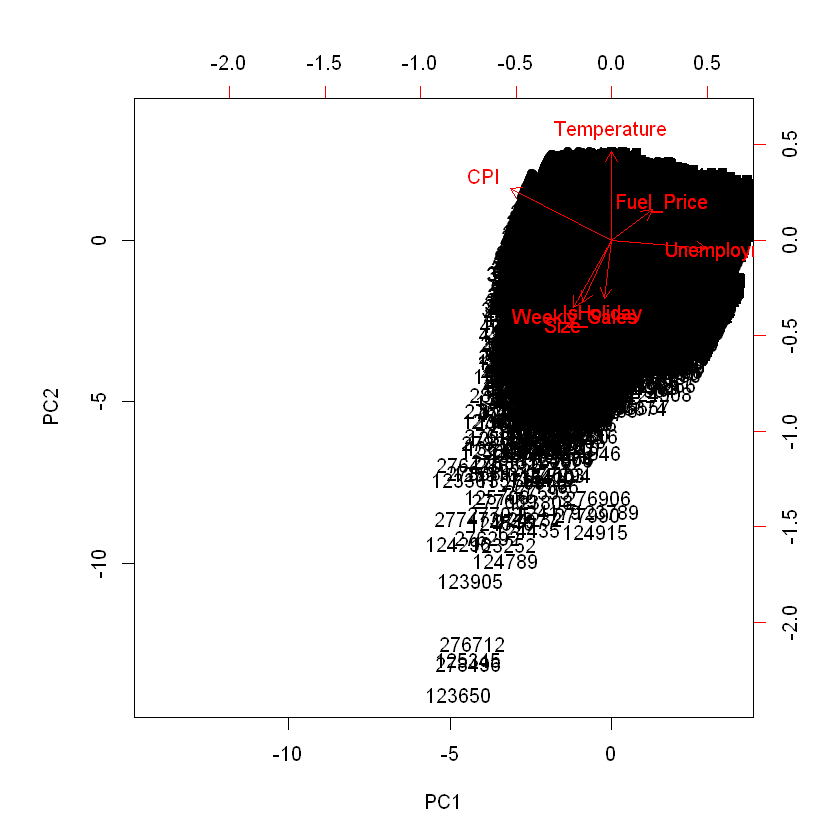

In [45]:
wm.out=prcomp(test1,scale=TRUE)
biplot(wm.out,scale=0)
wm.out$rotation=-wm.out$rotation

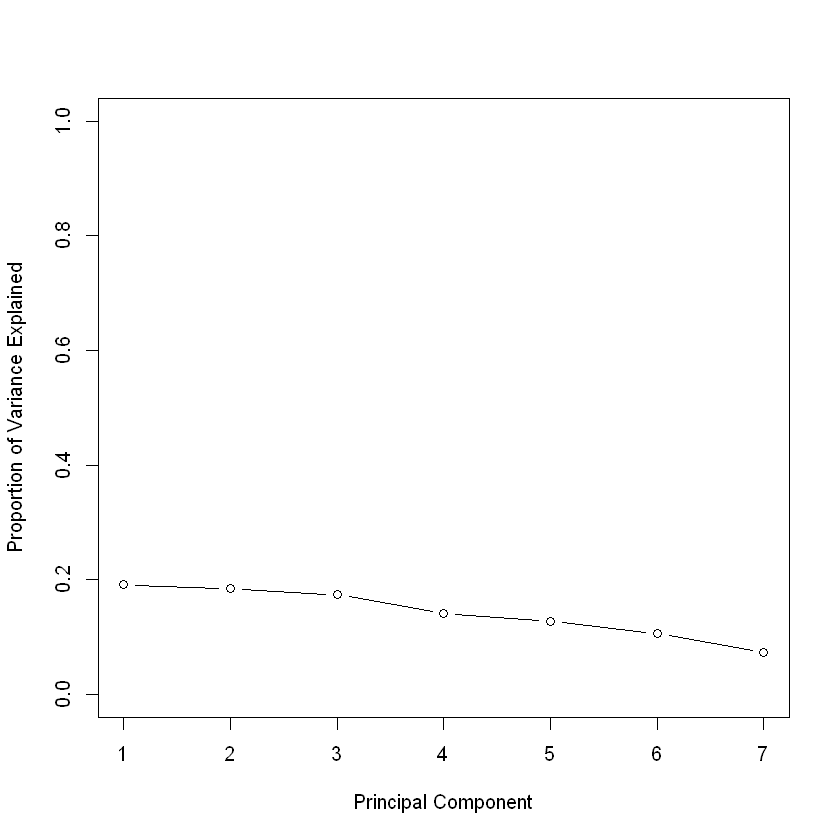

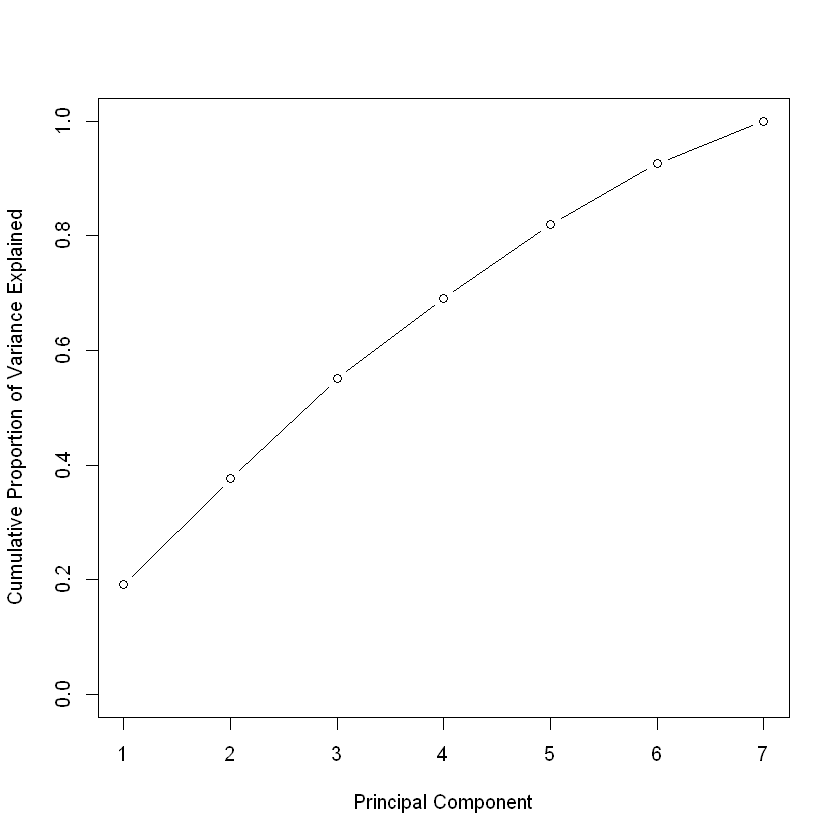

In [46]:
wm.var=wm.out$sdev^2
wmpve=wm.var/sum(wm.var)
plot(wmpve,xlab="Principal Component", ylab="Proportion of Variance Explained", ylim=c(0,1), type='b')
plot(cumsum(wmpve),xlab="Principal Component", ylab="Cumulative Proportion of Variance Explained", 
    ylim=c(0,1), type='b')

In [6]:
str(wm)
wm$Store<- as.factor(wm$Store)

'data.frame':	421570 obs. of  34 variables:
 $ Date                         : Factor w/ 143 levels "2010-02-05","2010-02-12",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Store                        : Factor w/ 45 levels "1","2","3","4",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ IsHoliday                    : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ Dept                         : int  1 26 17 45 28 79 55 5 58 7 ...
 $ Weekly_Sales                 : num  24924.5 11737.1 13223.8 37.4 1085.3 ...
 $ Temperature                  : num  42.3 42.3 42.3 42.3 42.3 ...
 $ Fuel_Price                   : num  2.57 2.57 2.57 2.57 2.57 ...
 $ MarkDown1                    : num  NA NA NA NA NA NA NA NA NA NA ...
 $ MarkDown2                    : num  NA NA NA NA NA NA NA NA NA NA ...
 $ MarkDown3                    : num  NA NA NA NA NA NA NA NA NA NA ...
 $ MarkDown4                    : num  NA NA NA NA NA NA NA NA NA NA ...
 $ MarkDown5                    : num  NA NA NA NA NA NA NA NA NA NA ...
 $ CPI             

In [6]:
wm2<-na.omit(wm)
head(wm2)

,Date,Store,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,MarkDown3_Imputed,MarkDown4_Imputed,MarkDown5_Imputed,TotalMarkDown_Imputed,Type,Size,Weekly_Sales_Week_Prev52,Weekly_Sales_Week_Prev1,Weekly_Sales_Week_Prev2,Weekly_Sales_Week_PercChange1
270139,2011-11-11,1,FALSE,55,23728.53,59.11,3.297,10382.9,6115.67,215.07,...,215.07,2406.62,6551.42,25671.68,A,151315,16218.90,12682.10,11531.50,0.099778870
270140,2011-11-11,1,FALSE,91,67041.24,59.11,3.297,10382.9,6115.67,215.07,...,215.07,2406.62,6551.42,25671.68,A,151315,65468.22,62223.17,56084.02,0.109463400
270141,2011-11-11,1,FALSE,44,5859.12,59.11,3.297,10382.9,6115.67,215.07,...,215.07,2406.62,6551.42,25671.68,A,151315,4641.38,5626.16,7105.29,-0.208173100
270142,2011-11-11,1,FALSE,26,7693.46,59.11,3.297,10382.9,6115.67,215.07,...,215.07,2406.62,6551.42,25671.68,A,151315,7582.52,9017.92,9038.21,-0.002244914
270143,2011-11-11,1,FALSE,14,14903.78,59.11,3.297,10382.9,6115.67,215.07,...,215.07,2406.62,6551.42,25671.68,A,151315,13837.16,13634.48,13031.03,0.046308700
270144,2011-11-11,1,FALSE,22,6596.53,59.11,3.297,10382.9,6115.67,215.07,...,215.07,2406.62,6551.42,25671.68,A,151315,7336.21,8835.52,6866.34,0.286787400


In [7]:
test2= wm2[-c(1:2,4,15:29)]
test2$Size = as.numeric(test2$Size)
head(test2)
str(test2)
test3= test2[-c(13:16)]
str(test3)

,IsHoliday,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Weekly_Sales_Week_Prev52,Weekly_Sales_Week_Prev1,Weekly_Sales_Week_Prev2,Weekly_Sales_Week_PercChange1
270139,FALSE,23728.53,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.9981,7.866,151315,16218.90,12682.10,11531.50,0.099778870
270140,FALSE,67041.24,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.9981,7.866,151315,65468.22,62223.17,56084.02,0.109463400
270141,FALSE,5859.12,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.9981,7.866,151315,4641.38,5626.16,7105.29,-0.208173100
270142,FALSE,7693.46,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.9981,7.866,151315,7582.52,9017.92,9038.21,-0.002244914
270143,FALSE,14903.78,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.9981,7.866,151315,13837.16,13634.48,13031.03,0.046308700
270144,FALSE,6596.53,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.9981,7.866,151315,7336.21,8835.52,6866.34,0.286787400


'data.frame':	95249 obs. of  16 variables:
 $ IsHoliday                    : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ Weekly_Sales                 : num  23729 67041 5859 7693 14904 ...
 $ Temperature                  : num  59.1 59.1 59.1 59.1 59.1 ...
 $ Fuel_Price                   : num  3.3 3.3 3.3 3.3 3.3 ...
 $ MarkDown1                    : num  10383 10383 10383 10383 10383 ...
 $ MarkDown2                    : num  6116 6116 6116 6116 6116 ...
 $ MarkDown3                    : num  215 215 215 215 215 ...
 $ MarkDown4                    : num  2407 2407 2407 2407 2407 ...
 $ MarkDown5                    : num  6551 6551 6551 6551 6551 ...
 $ CPI                          : num  218 218 218 218 218 ...
 $ Unemployment                 : num  7.87 7.87 7.87 7.87 7.87 ...
 $ Size                         : num  151315 151315 151315 151315 151315 ...
 $ Weekly_Sales_Week_Prev52     : num  16219 65468 4641 7583 13837 ...
 $ Weekly_Sales_Week_Prev1      : num  12682 62223 5626

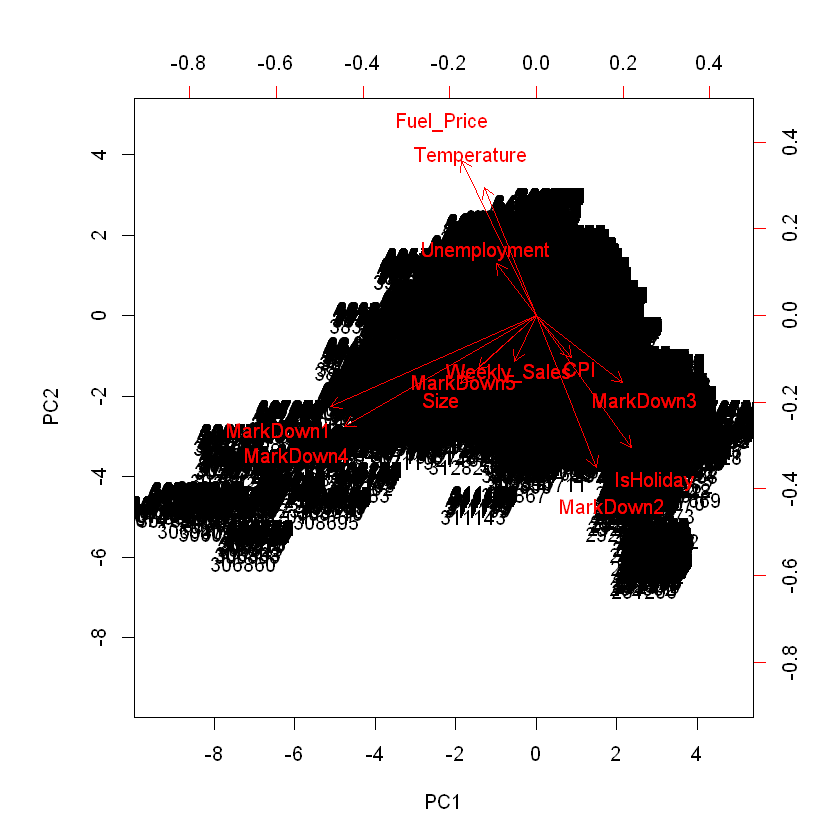

In [62]:
help(prcomp)
wm.out=prcomp(test3,scale=TRUE)
biplot(wm.out,scale=0)
#wm.out$rotation=-wm.out$rotation

In [63]:
cor(test2)

,IsHoliday,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Weekly_Sales_Week_Prev52,Weekly_Sales_Week_Prev1,Weekly_Sales_Week_Prev2,Weekly_Sales_Week_PercChange1
IsHoliday,1.000000000,0.01647052,-0.151764988,-0.134391146,-0.061161613,0.345430355,0.42061302,-0.01620269,-0.075157938,-0.00216629,0.022071850,-0.023664920,0.007339762,0.026593928,-0.002626767,NaN
Weekly_Sales,0.016470516,1.00000000,0.010098936,-0.024581002,0.035903728,0.017043867,0.06609985,0.02911741,0.059835730,-0.01574283,-0.038506477,0.211542609,0.984425240,0.936661699,0.920342720,NaN
Temperature,-0.151764988,0.01009894,1.000000000,0.248920681,0.017408517,-0.333274166,-0.08842562,-0.05956887,0.024044410,0.20179138,-0.010026667,0.076331243,0.010378557,0.006408952,0.006842876,NaN
Fuel_Price,-0.134391146,-0.02458100,0.248920681,1.000000000,0.082788262,-0.244392135,-0.09330458,-0.02720474,-0.138897523,-0.36498376,0.276042729,0.003305031,-0.016745150,-0.024216988,-0.023390645,NaN
MarkDown1,-0.061161613,0.03590373,0.017408517,0.082788262,1.000000000,-0.001780999,-0.12981077,0.82854042,0.106298028,-0.04516699,0.063854885,0.182337661,0.037248289,0.025383659,0.029538530,NaN
MarkDown2,0.345430355,0.01704387,-0.333274166,-0.244392135,-0.001780999,1.000000000,-0.05061754,-0.01727223,-0.023051109,-0.03742510,0.018348042,0.081077194,0.003767542,0.092735736,0.086851410,NaN
MarkDown3,0.420613021,0.06609985,-0.088425622,-0.093304575,-0.129810768,-0.050617542,1.00000000,-0.07948346,-0.042420831,-0.02497302,0.013981866,0.034384863,0.068056257,0.015586249,0.017084860,NaN
MarkDown4,-0.016202686,0.02911741,-0.059568867,-0.027204739,0.828540416,-0.017272234,-0.07948346,1.00000000,0.100479612,-0.04117646,0.018252106,0.131765675,0.030741322,0.011701052,0.013397926,NaN
MarkDown5,-0.075157938,0.05983573,0.024044410,-0.138897523,0.106298028,-0.023051109,-0.04242083,0.10047961,1.000000000,0.07722635,0.002740029,0.209455800,0.055548946,0.073378518,0.063881222,NaN
CPI,-0.002166290,-0.01574283,0.201791375,-0.364983759,-0.045166992,-0.037425098,-0.02497302,-0.04117646,0.077226352,1.00000000,-0.290170895,0.021536492,-0.018315205,-0.015401697,-0.015824689,NaN


,IsHoliday,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Weekly_Sales_Week_Prev52,Weekly_Sales_Week_Prev1,Weekly_Sales_Week_Prev2
IsHoliday,1.000000000,0.01647052,-0.151764988,-0.134391146,-0.061161613,0.345430355,0.42061302,-0.01620269,-0.075157938,-0.00216629,0.022071850,-0.023664920,0.007339762,0.026593928,-0.002626767
Weekly_Sales,0.016470516,1.00000000,0.010098936,-0.024581002,0.035903728,0.017043867,0.06609985,0.02911741,0.059835730,-0.01574283,-0.038506477,0.211542609,0.984425240,0.936661699,0.920342720
Temperature,-0.151764988,0.01009894,1.000000000,0.248920681,0.017408517,-0.333274166,-0.08842562,-0.05956887,0.024044410,0.20179138,-0.010026667,0.076331243,0.010378557,0.006408952,0.006842876
Fuel_Price,-0.134391146,-0.02458100,0.248920681,1.000000000,0.082788262,-0.244392135,-0.09330458,-0.02720474,-0.138897523,-0.36498376,0.276042729,0.003305031,-0.016745150,-0.024216988,-0.023390645
MarkDown1,-0.061161613,0.03590373,0.017408517,0.082788262,1.000000000,-0.001780999,-0.12981077,0.82854042,0.106298028,-0.04516699,0.063854885,0.182337661,0.037248289,0.025383659,0.029538530
MarkDown2,0.345430355,0.01704387,-0.333274166,-0.244392135,-0.001780999,1.000000000,-0.05061754,-0.01727223,-0.023051109,-0.03742510,0.018348042,0.081077194,0.003767542,0.092735736,0.086851410
MarkDown3,0.420613021,0.06609985,-0.088425622,-0.093304575,-0.129810768,-0.050617542,1.00000000,-0.07948346,-0.042420831,-0.02497302,0.013981866,0.034384863,0.068056257,0.015586249,0.017084860
MarkDown4,-0.016202686,0.02911741,-0.059568867,-0.027204739,0.828540416,-0.017272234,-0.07948346,1.00000000,0.100479612,-0.04117646,0.018252106,0.131765675,0.030741322,0.011701052,0.013397926
MarkDown5,-0.075157938,0.05983573,0.024044410,-0.138897523,0.106298028,-0.023051109,-0.04242083,0.10047961,1.000000000,0.07722635,0.002740029,0.209455800,0.055548946,0.073378518,0.063881222
CPI,-0.002166290,-0.01574283,0.201791375,-0.364983759,-0.045166992,-0.037425098,-0.02497302,-0.04117646,0.077226352,1.00000000,-0.290170895,0.021536492,-0.018315205,-0.015401697,-0.015824689


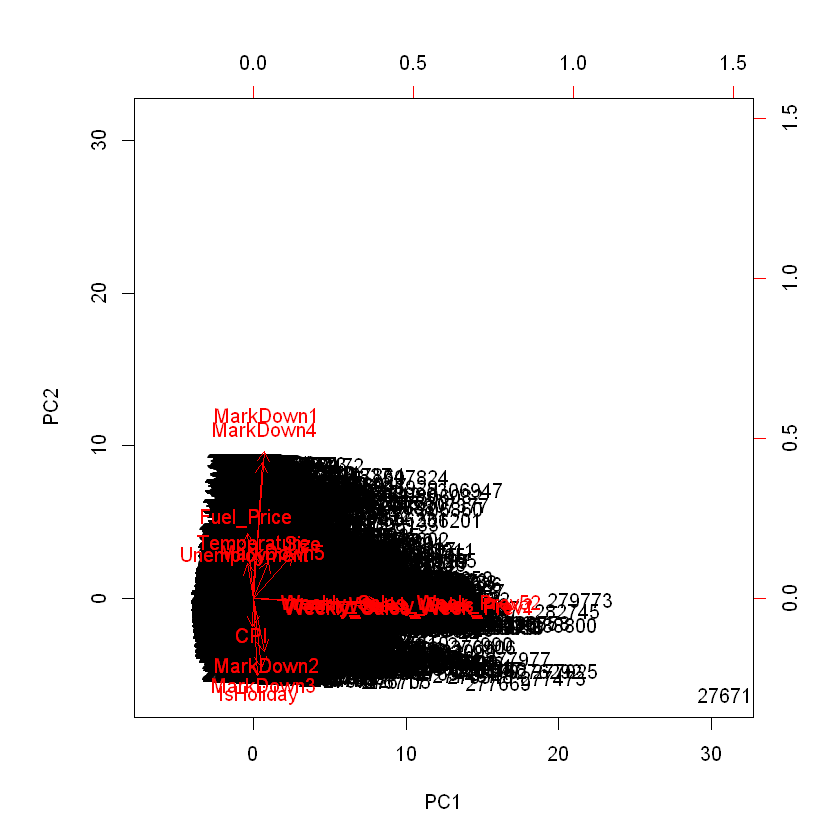

In [10]:
test4= test2[-c(16)]
cor(test4)
wm.out=prcomp(test4,scale=TRUE)
biplot(wm.out,scale=0)

,IsHoliday,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
IsHoliday,1.00000000,0.01647052,-0.15176499,-0.13439115,-0.061161613,0.345430355,0.42061302,-0.01620269,-0.075157938,-0.00216629,0.022071850
Weekly_Sales,0.01647052,1.00000000,0.01009894,-0.02458100,0.035903728,0.017043867,0.06609985,0.02911741,0.059835730,-0.01574283,-0.038506477
Temperature,-0.15176499,0.01009894,1.00000000,0.24892068,0.017408517,-0.333274166,-0.08842562,-0.05956887,0.024044410,0.20179138,-0.010026667
Fuel_Price,-0.13439115,-0.02458100,0.24892068,1.00000000,0.082788262,-0.244392135,-0.09330458,-0.02720474,-0.138897523,-0.36498376,0.276042729
MarkDown1,-0.06116161,0.03590373,0.01740852,0.08278826,1.000000000,-0.001780999,-0.12981077,0.82854042,0.106298028,-0.04516699,0.063854885
MarkDown2,0.34543035,0.01704387,-0.33327417,-0.24439214,-0.001780999,1.000000000,-0.05061754,-0.01727223,-0.023051109,-0.03742510,0.018348042
MarkDown3,0.42061302,0.06609985,-0.08842562,-0.09330458,-0.129810768,-0.050617542,1.00000000,-0.07948346,-0.042420831,-0.02497302,0.013981866
MarkDown4,-0.01620269,0.02911741,-0.05956887,-0.02720474,0.828540416,-0.017272234,-0.07948346,1.00000000,0.100479612,-0.04117646,0.018252106
MarkDown5,-0.07515794,0.05983573,0.02404441,-0.13889752,0.106298028,-0.023051109,-0.04242083,0.10047961,1.000000000,0.07722635,0.002740029
CPI,-0.00216629,-0.01574283,0.20179138,-0.36498376,-0.045166992,-0.037425098,-0.02497302,-0.04117646,0.077226352,1.00000000,-0.290170895


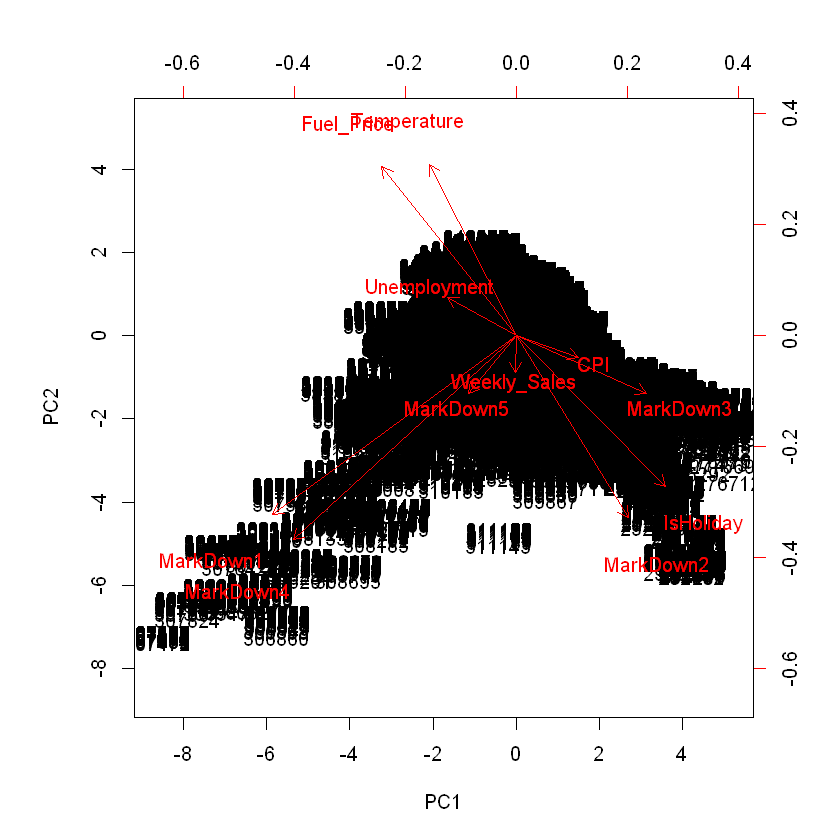

In [12]:
test5= test2[-c(12:16)]
cor(test5)
wm.out=prcomp(test5,scale=TRUE)
biplot(wm.out,scale=0)

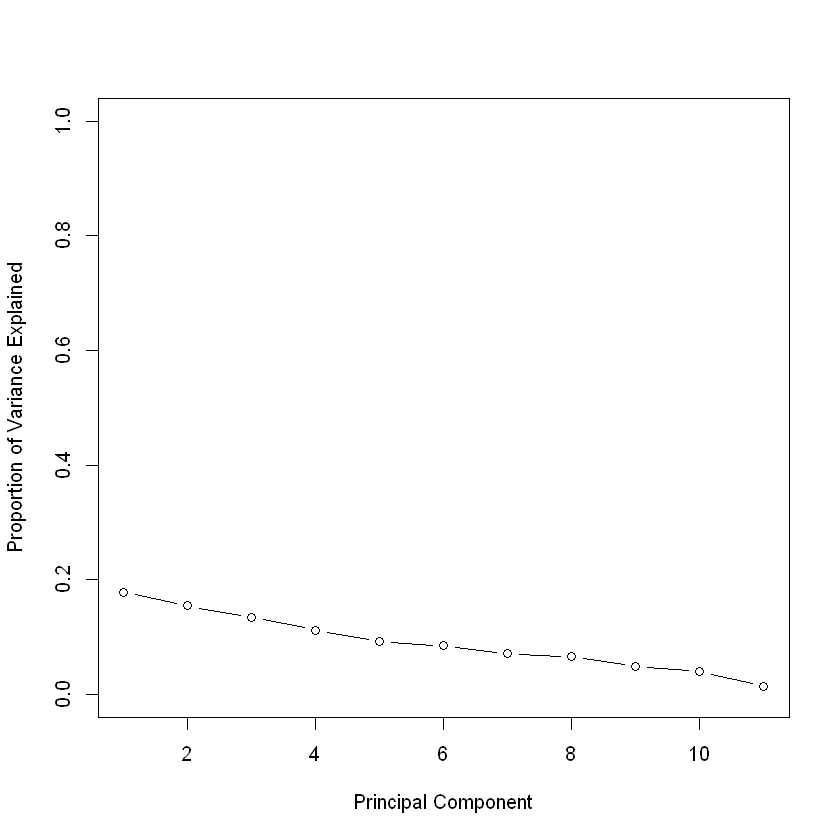

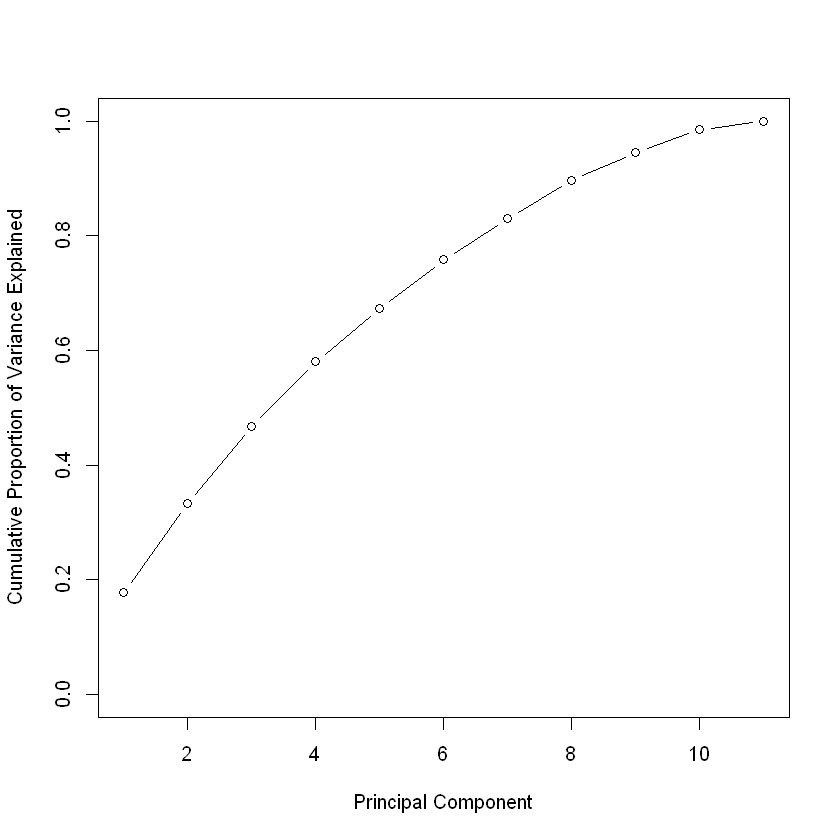

In [59]:
wm.var=wm.out$sdev^2
wmpve=wm.var/sum(wm.var)
plot(wmpve,xlab="Principal Component", ylab="Proportion of Variance Explained", ylim=c(0,1), type='b')
plot(cumsum(wmpve),xlab="Principal Component", ylab="Cumulative Proportion of Variance Explained", 
    ylim=c(0,1), type='b')

In [14]:
lm1 = lm(Weekly_Sales~., data=test4)
summary(lm1)


Call:
lm(formula = Weekly_Sales ~ ., data = test4)

Residuals:
    Min      1Q  Median      3Q     Max 
-129080    -832     -56     794   99998 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)               3.055e+03  2.257e+02  13.536  < 2e-16 ***
IsHolidayTRUE             5.539e+02  5.029e+01  11.013  < 2e-16 ***
Temperature               1.487e+00  7.856e-01   1.893   0.0584 .  
Fuel_Price               -5.965e+02  5.482e+01 -10.882  < 2e-16 ***
MarkDown1                 6.261e-03  2.507e-03   2.497   0.0125 *  
MarkDown2                -2.432e-02  1.528e-03 -15.921  < 2e-16 ***
MarkDown3                 1.446e-02  1.338e-03  10.807  < 2e-16 ***
MarkDown4                 3.695e-03  3.200e-03   1.155   0.2483    
MarkDown5                 1.295e-03  2.000e-03   0.648   0.5171    
CPI                      -1.491e+00  3.661e-01  -4.073 4.65e-05 ***
Unemployment             -8.257e+01  7.841e+00 -10.530  < 2e-16 ***
Size                   

In [15]:
lm1 = lm(Weekly_Sales~., data=test5)
summary(lm1)


Call:
lm(formula = Weekly_Sales ~ ., data = test5)

Residuals:
   Min     1Q Median     3Q    Max 
-42677 -14543  -8890   4982 588310 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    2.844e+04  1.434e+03  19.828  < 2e-16 ***
IsHolidayTRUE -1.733e+03  3.196e+02  -5.423 5.88e-08 ***
Temperature    4.989e+01  4.998e+00   9.983  < 2e-16 ***
Fuel_Price    -1.567e+03  3.506e+02  -4.468 7.89e-06 ***
MarkDown1      1.358e-01  1.595e-02   8.511  < 2e-16 ***
MarkDown2      9.199e-02  9.432e-03   9.753  < 2e-16 ***
MarkDown3      1.969e-01  8.450e-03  23.296  < 2e-16 ***
MarkDown4     -3.708e-02  2.048e-02  -1.811   0.0702 .  
MarkDown5      2.227e-01  1.252e-02  17.789  < 2e-16 ***
CPI           -2.719e+01  2.342e+00 -11.607  < 2e-16 ***
Unemployment  -7.342e+02  5.009e+01 -14.657  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 24670 on 95238 degrees of freedom
Multiple R-squared:  0.01443,	Adjusted

In [16]:
lm1 = lm(Weekly_Sales~Weekly_Sales_Week_Prev52, data=test4)
summary(lm1)


Call:
lm(formula = Weekly_Sales ~ Weekly_Sales_Week_Prev52, data = test4)

Residuals:
    Min      1Q  Median      3Q     Max 
-123465   -1004    -338     854  100985 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              4.675e+02  1.748e+01   26.75   <2e-16 ***
Weekly_Sales_Week_Prev52 9.939e-01  5.751e-04 1728.15   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4368 on 95247 degrees of freedom
Multiple R-squared:  0.9691,	Adjusted R-squared:  0.9691 
F-statistic: 2.986e+06 on 1 and 95247 DF,  p-value: < 2.2e-16


In [18]:
lm1 = lm(Weekly_Sales~Weekly_Sales_Week_Prev1, data=test4)
summary(lm1)
lm1 = lm(Weekly_Sales~Weekly_Sales_Week_Prev2, data=test4)
summary(lm1)


Call:
lm(formula = Weekly_Sales ~ Weekly_Sales_Week_Prev1, data = test4)

Residuals:
    Min      1Q  Median      3Q     Max 
-433691   -1271    -727     777  496748 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             1.107e+03  3.498e+01   31.64   <2e-16 ***
Weekly_Sales_Week_Prev1 9.328e-01  1.130e-03  825.37   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8702 on 95247 degrees of freedom
Multiple R-squared:  0.8773,	Adjusted R-squared:  0.8773 
F-statistic: 6.812e+05 on 1 and 95247 DF,  p-value: < 2.2e-16



Call:
lm(formula = Weekly_Sales ~ Weekly_Sales_Week_Prev2, data = test4)

Residuals:
    Min      1Q  Median      3Q     Max 
-422395   -1549    -903     935  477707 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             1.361e+03  3.910e+01    34.8   <2e-16 ***
Weekly_Sales_Week_Prev2 9.181e-01  1.264e-03   726.2   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9718 on 95247 degrees of freedom
Multiple R-squared:  0.847,	Adjusted R-squared:  0.847 
F-statistic: 5.274e+05 on 1 and 95247 DF,  p-value: < 2.2e-16



Call:
lm(formula = Weekly_Sales ~ Size, data = wm)

Residuals:
   Min     1Q Median     3Q    Max 
-27288 -12872  -6620   4283 678046 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3.565e+03  8.328e+01   42.81   <2e-16 ***
Size        9.081e-02  5.563e-04  163.24   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 22030 on 421568 degrees of freedom
Multiple R-squared:  0.05945,	Adjusted R-squared:  0.05945 
F-statistic: 2.665e+04 on 1 and 421568 DF,  p-value: < 2.2e-16


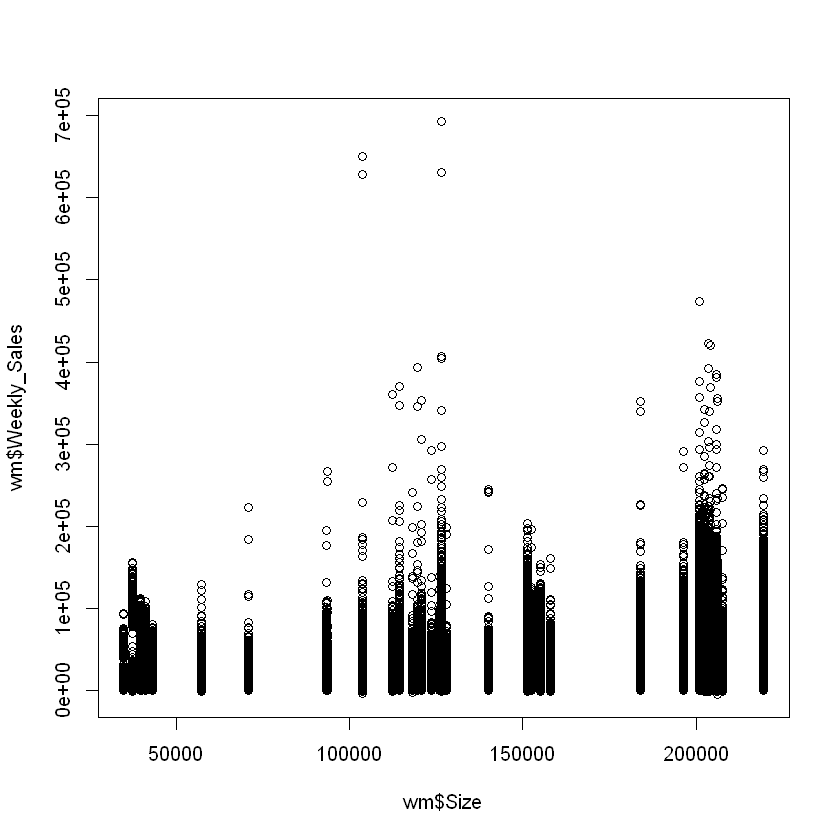

In [3]:
library(dplyr)
library(stats)

# A plot of Size vs. Weekly_Sales before aggregating Weekly_Sales to the store level
plot(wm$Size,wm$Weekly_Sales) # Not clearly linear, I don't like this plot

# Let's try a simple regression, regressing size on weekly sales
size.lm1 <- lm(Weekly_Sales~Size,data=wm)
summary(size.lm1) # Bad R-squared: .059 :-(



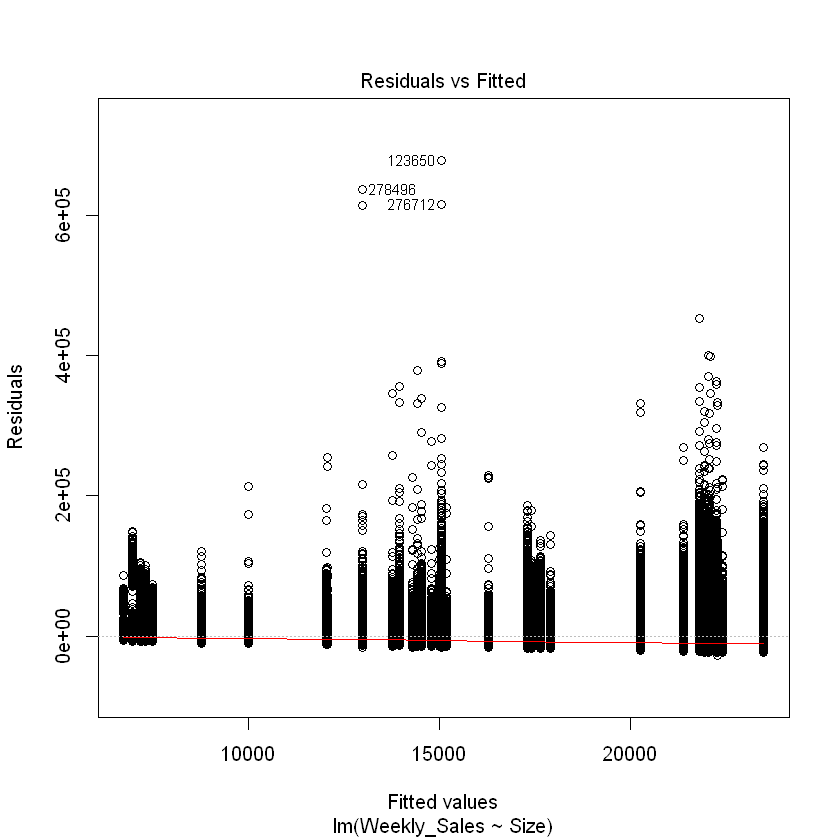

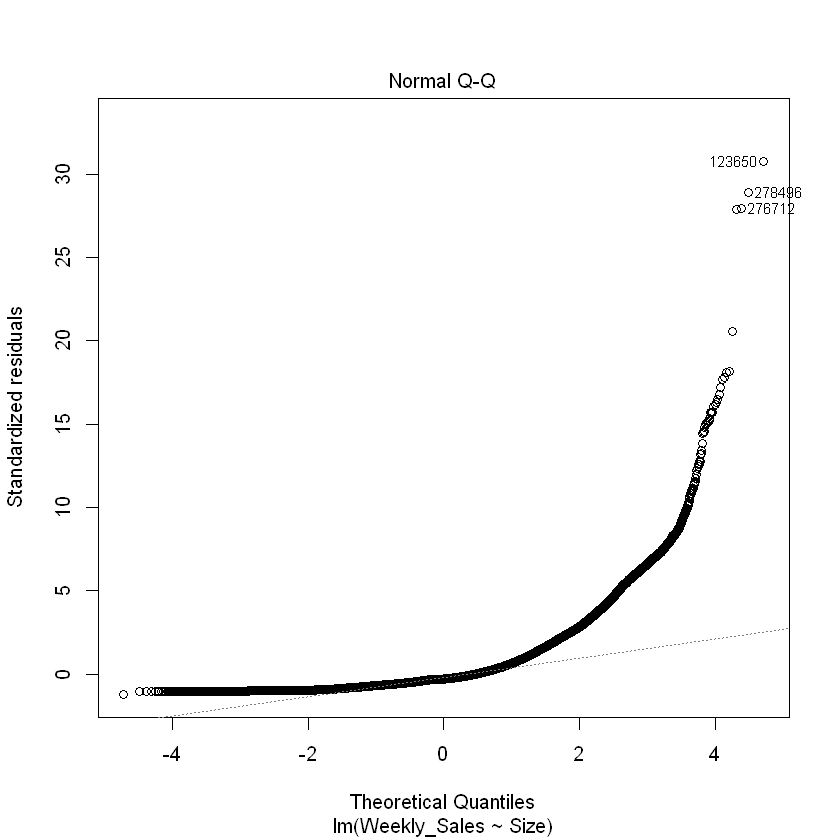

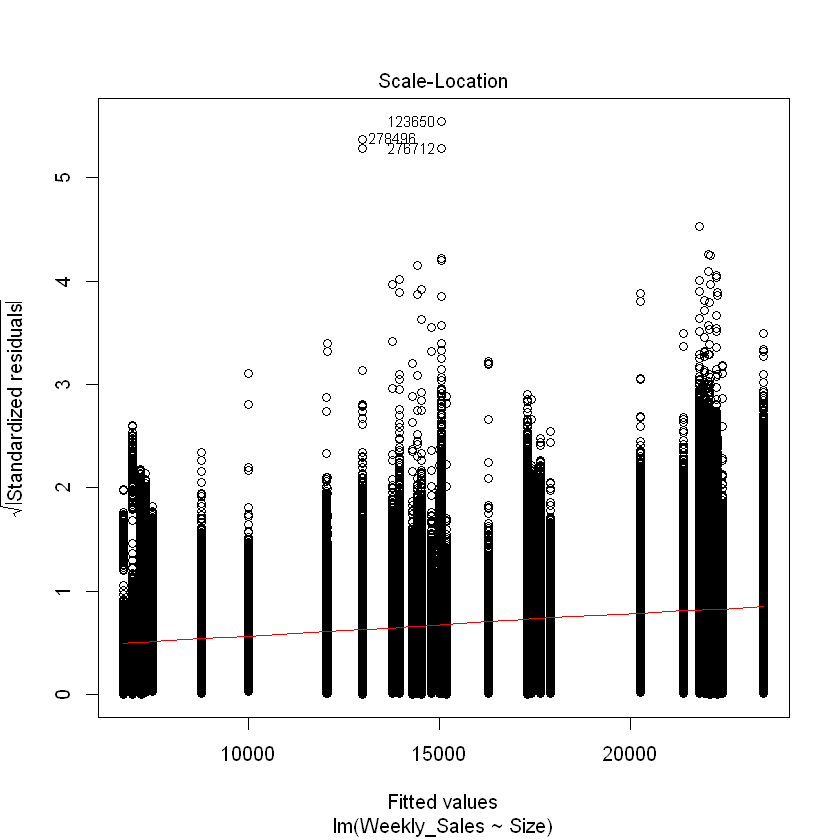

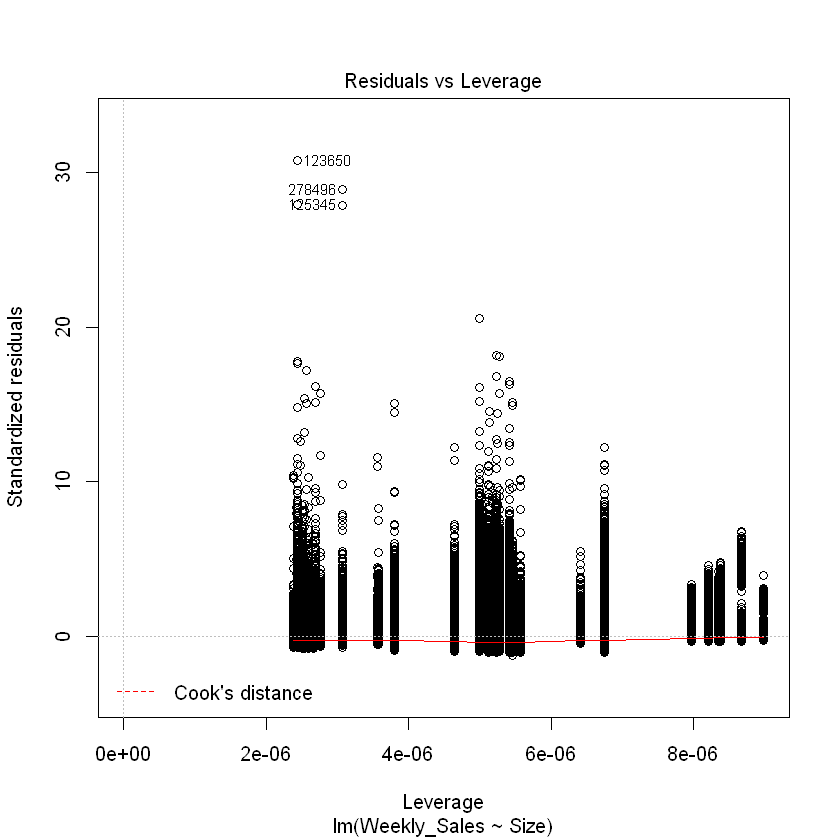

In [13]:
plot(size.lm1)

Warning message in `[<-.factor`(`*tmp*`, wm$Type == "A", value = 1):
"invalid factor level, NA generated"Warning message in `[<-.factor`(`*tmp*`, wm$Type == "B", value = 2):
"invalid factor level, NA generated"Warning message in `[<-.factor`(`*tmp*`, wm$Type == "C", value = 3):
"invalid factor level, NA generated"Warning message:
"package 'bindrcpp' was built under R version 3.4.4"

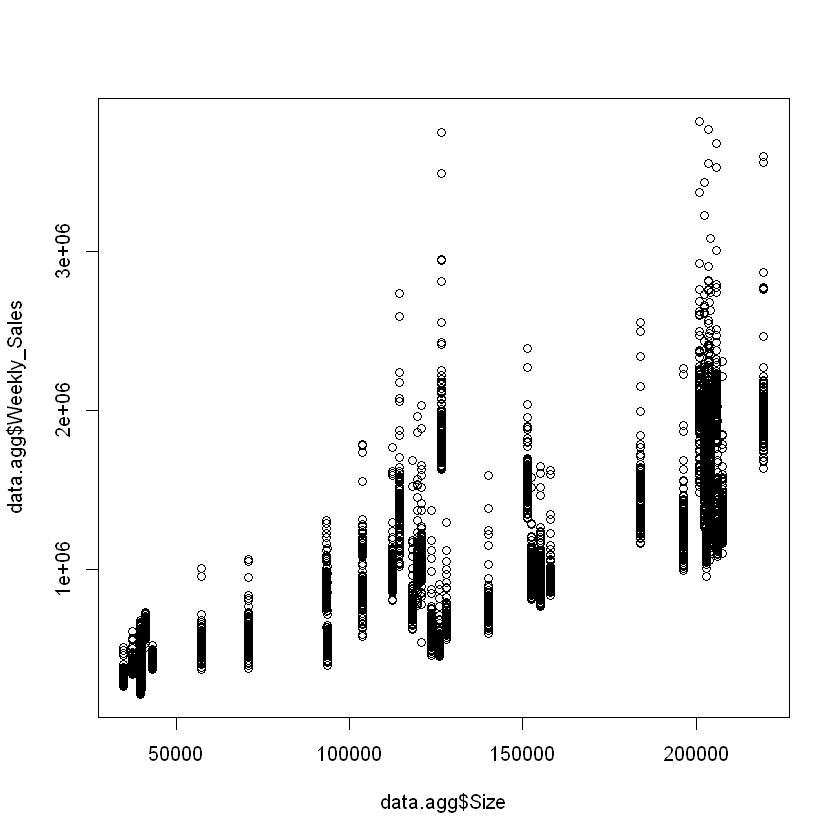

In [9]:
# Instead, let's try aggregating
# First, change store type to A=1, B=2, C=3 (will make agg easier)
wm$Type[wm$Type=='A']<- 1
wm$Type[wm$Type=='B']<- 2
wm$Type[wm$Type=='C']<- 3
wm$Type <- as.numeric(wm$Type)

# Aggregate data to the store level (not including mark down data for now)
wm %>%
  group_by(Date,Store)%>%
  summarise(Weekly_Sales=sum(Weekly_Sales),
            IsHoliday=any(IsHoliday),
            Temperature=mean(Temperature),
            Fuel_Price=mean(Fuel_Price),
            CPI=mean(CPI),
            Unemployment=mean(Unemployment),
            Type=mean(Type),
            Size=mean(Size),
            Week=mean(Week),
            IsHolidayFixed=any(IsHolidayFixed))->data.agg

# If we plot the aggregated weekly sales against size of the store, 
# the relationship is more clearly linear
plot(data.agg$Size,data.agg$Weekly_Sales)



In [68]:
da1=data.agg[-1]
cor(da1)

,Store,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Week,IsHolidayFixed
Store,1.00000000,-0.335332015,0.000000e+00,-0.02265908,0.060022955,-0.209491938,0.22353127,NA,-2.442698e-01,0.000000e+00,0.000000e+00
Weekly_Sales,-0.33533201,1.000000000,3.689097e-02,-0.06381001,0.009463786,-0.072634165,-0.10617609,NA,8.104685e-01,7.421127e-02,8.602823e-02
IsHoliday,0.00000000,0.036890968,1.000000e+00,-0.15509133,-0.078346518,-0.002162099,0.01096028,NA,8.137956e-21,1.277427e-01,4.816727e-01
Temperature,-0.02265908,-0.063810013,-1.550913e-01,1.00000000,0.144981806,0.176887675,0.10115786,NA,-9.248017e-02,2.361833e-01,-2.294323e-01
Fuel_Price,0.06002295,0.009463786,-7.834652e-02,0.14498181,1.000000000,-0.170641800,-0.03468374,NA,9.053225e-03,-3.240300e-02,-9.603557e-02
CPI,-0.20949194,-0.072634165,-2.162099e-03,0.17688767,-0.170641800,1.000000000,-0.30202007,NA,-9.737306e-03,6.041531e-03,-2.656925e-03
Unemployment,0.22353127,-0.106176090,1.096028e-02,0.10115786,-0.034683745,-0.302020065,1.00000000,NA,-8.917014e-02,-1.589158e-02,1.074177e-02
Type,NA,NA,NA,NA,NA,NA,NA,1,NA,NA,NA
Size,-0.24426984,0.810468495,8.137956e-21,-0.09248017,0.009053225,-0.009737306,-0.08917014,NA,1.000000e+00,-1.389434e-21,-3.444911e-21
Week,0.00000000,0.074211270,1.277427e-01,0.23618333,-0.032403001,0.006041531,-0.01589158,NA,-1.389434e-21,1.000000e+00,1.788626e-01


In [ ]:
# Weekly_Sales ~ Temperature + CPI + Unemployment + Type + Size + Week + IsHolidayFixed (adjR2=.6806188; cp=11.532115)
# Weekly_Sales ~ Temperature + Fuel_Price + CPI + Unemployment + Type + Size + Week + IsHolidayFixed (adjR2=.6808181; cp=8.519027)
# Weekly_Sales ~ IsHoliday + Temperature + CPI + Unemployment + Type + Size + Week + IsHolidayFixed (adjR2=.6805914; cp=13.082784)
# Weekly_Sales ~ IsHoliday + Temperature + Fuel_Price + CPI + Unemployment + Type + Size + Week + IsHolidayFixed (adjR2=.6807942; cp=10)

Classes 'tbl_df', 'tbl' and 'data.frame':	6435 obs. of  11 variables:
 $ Store         : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Weekly_Sales  : num  1643691 2136989 461622 2135144 317173 ...
 $ IsHoliday     : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ Temperature   : num  42.3 40.2 45.7 43.8 39.7 ...
 $ Fuel_Price    : num  2.57 2.57 2.57 2.6 2.57 ...
 $ CPI           : num  211 211 214 126 212 ...
 $ Unemployment  : num  8.11 8.32 7.37 8.62 6.57 ...
 $ Type          : num  NA NA NA NA NA NA NA NA NA NA ...
 $ Size          : num  151315 202307 37392 205863 34875 ...
 $ Week          : num  5 5 5 5 5 5 5 5 5 5 ...
 $ IsHolidayFixed: logi  FALSE FALSE FALSE FALSE FALSE FALSE ...


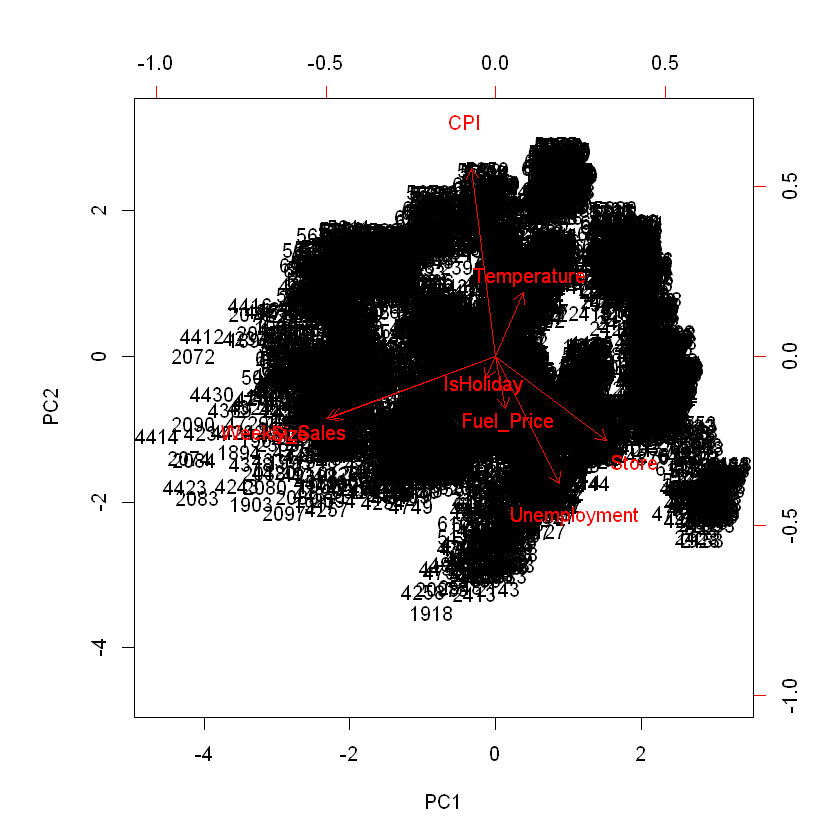

In [72]:
str(da1)
da2=da1[-c(10:11,8)]
wm.out=prcomp(da2,scale=TRUE)
biplot(wm.out,scale=0)

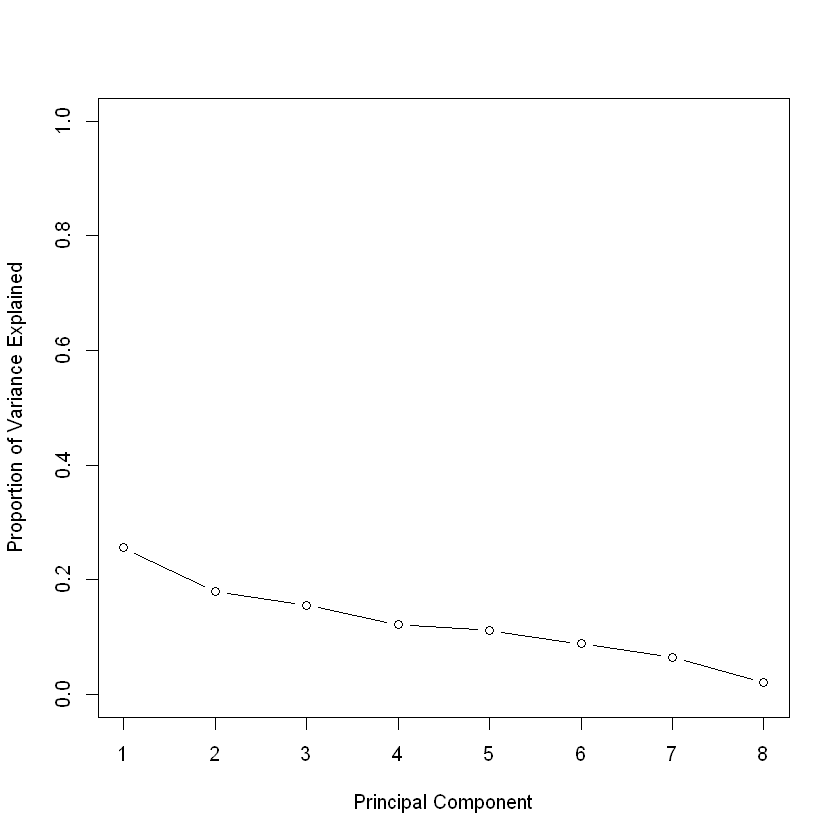

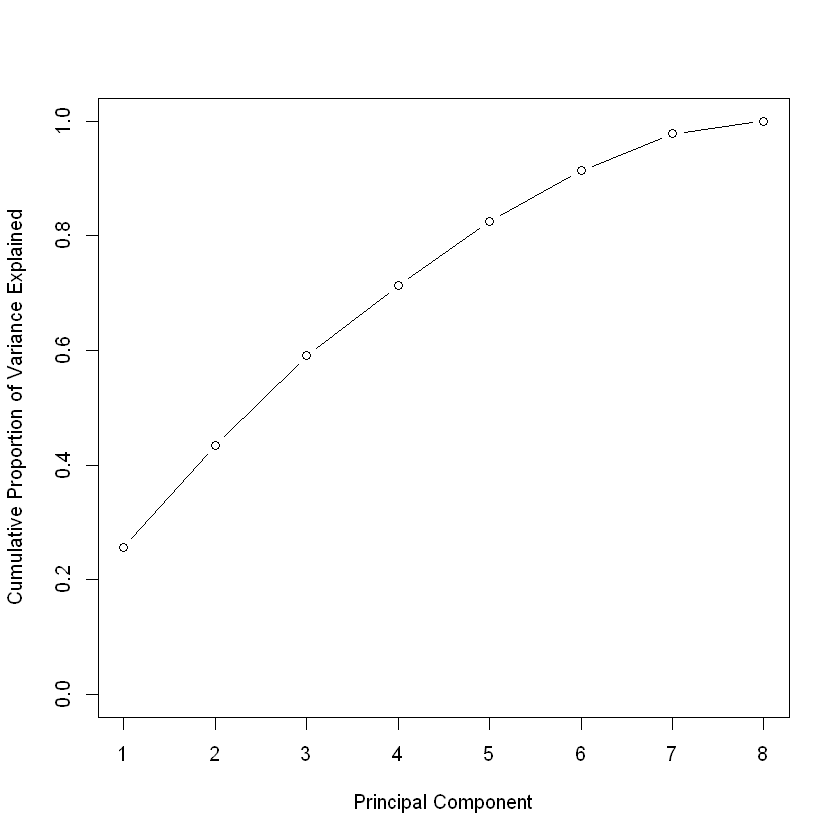

In [73]:
wm.var=wm.out$sdev^2
wmpve=wm.var/sum(wm.var)
plot(wmpve,xlab="Principal Component", ylab="Proportion of Variance Explained", ylim=c(0,1), type='b')
plot(cumsum(wmpve),xlab="Principal Component", ylab="Cumulative Proportion of Variance Explained", 
    ylim=c(0,1), type='b')

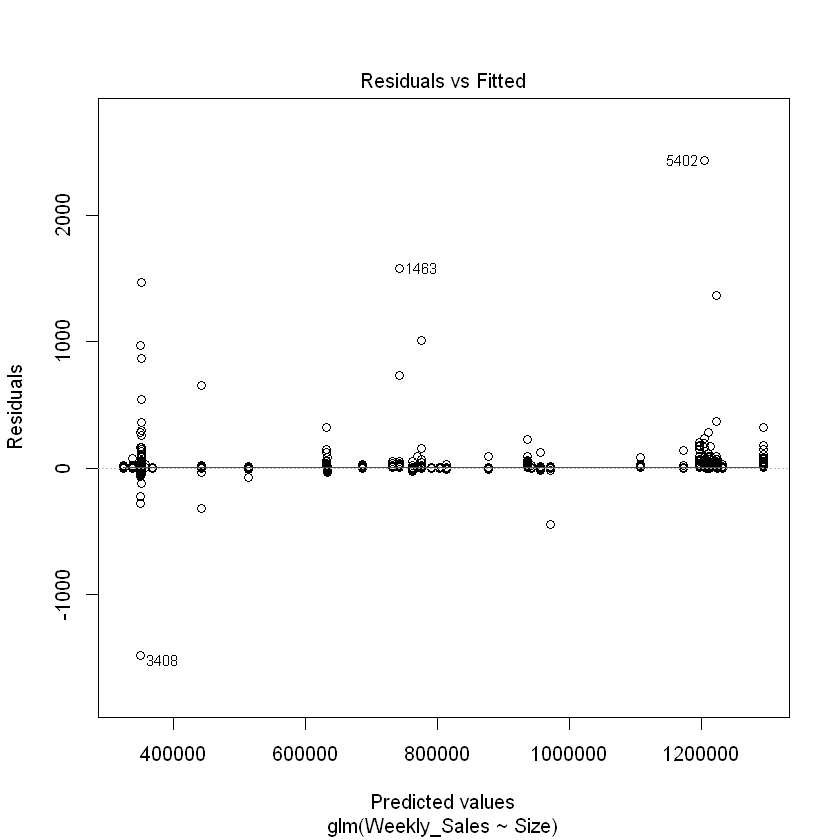

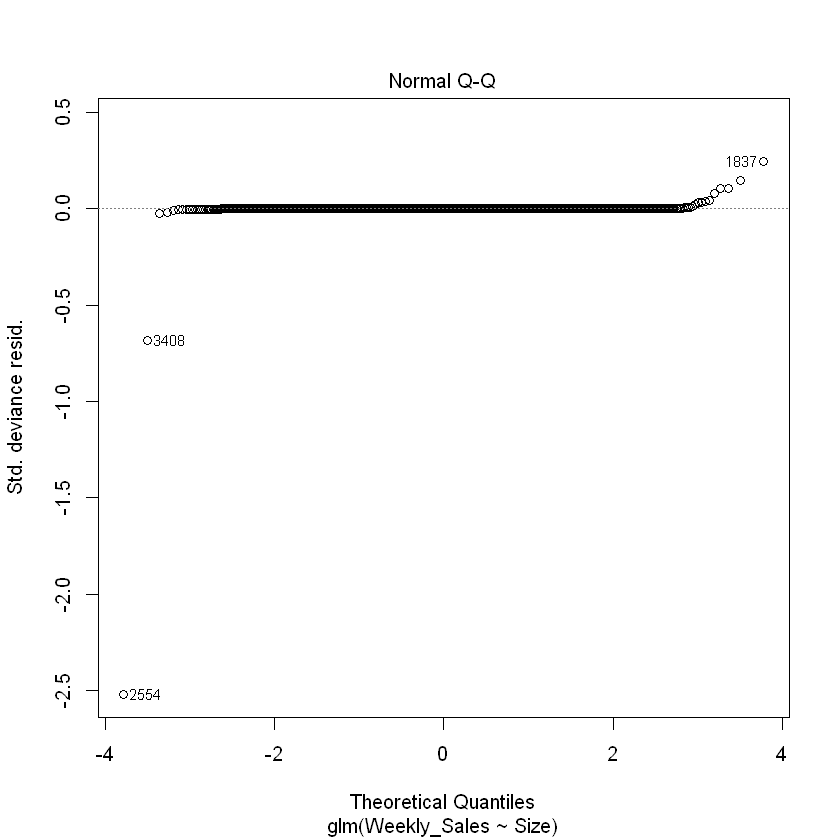

Warning message in sqrt(crit * p * (1 - hh)/hh):
"NaNs produced"Warning message in sqrt(crit * p * (1 - hh)/hh):
"NaNs produced"

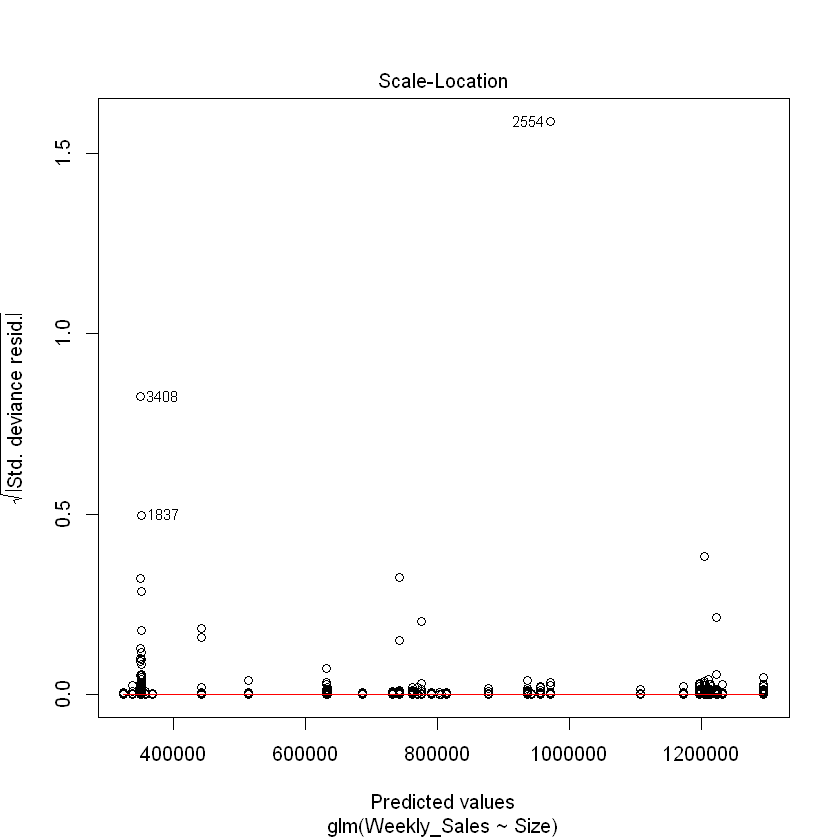

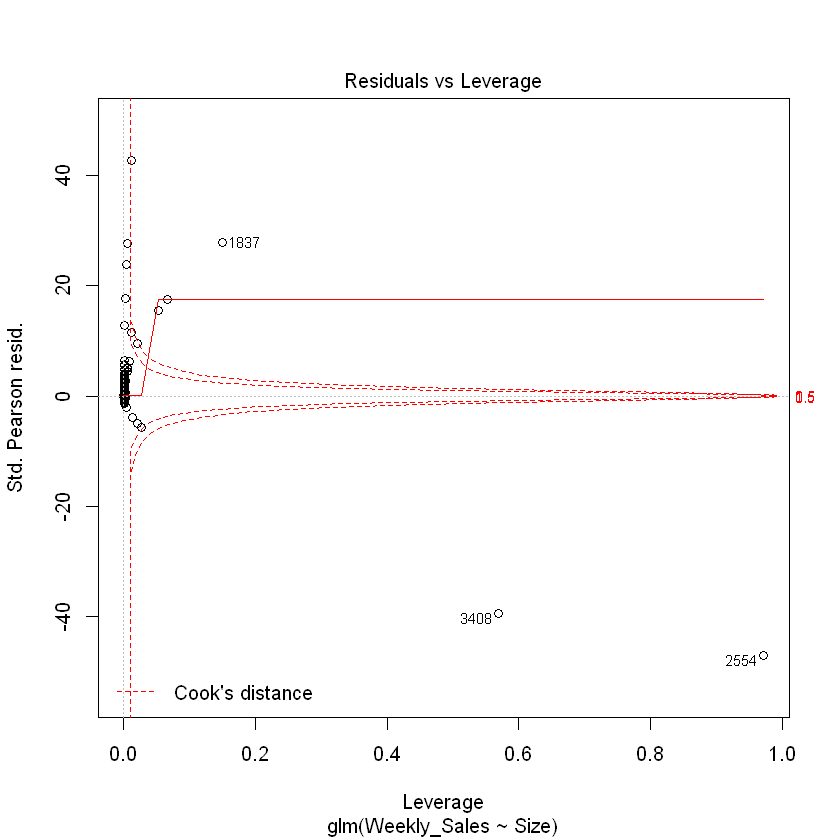

In [82]:
glmod1<-glm(Weekly_Sales~Size,data=data.agg,weights=w)
plot(glmod1)

In [79]:
summary(glmod1)


Call:
glm(formula = Weekly_Sales ~ Size, data = data.agg, weights = w)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1482.32     -0.59      1.08      2.62   2433.09  

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.423e+05  3.351e+03   42.47   <2e-16 ***
Size        5.249e+00  2.286e-02  229.59   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 3277.263)

    Null deviance: 193829306  on 6434  degrees of freedom
Residual deviance:  21082633  on 6433  degrees of freedom
AIC: 216073

Number of Fisher Scoring iterations: 2


In [87]:
library(nnet)
library(MASS)
mn<-polr(Weekly_Sales~IsHoliday,data=data.agg)

ERROR: Error in polr(Weekly_Sales ~ IsHoliday, data = data.agg): response must be a factor



Call:
lm(formula = Weekly_Sales ~ Size, data = data.agg)

Residuals:
    Min      1Q  Median      3Q     Max 
-618490 -244595  -32219  161036 2729454 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.028e+05  9.454e+03   10.87   <2e-16 ***
Size        7.247e+00  6.530e-02  110.97   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 330600 on 6433 degrees of freedom
Multiple R-squared:  0.6569,	Adjusted R-squared:  0.6568 
F-statistic: 1.231e+04 on 1 and 6433 DF,  p-value: < 2.2e-16


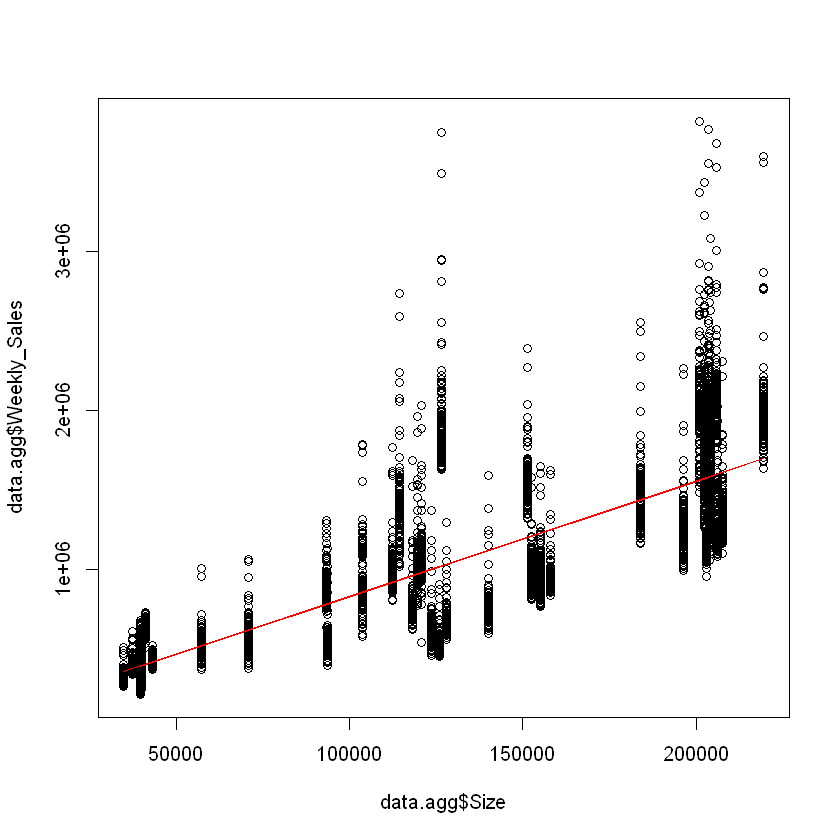

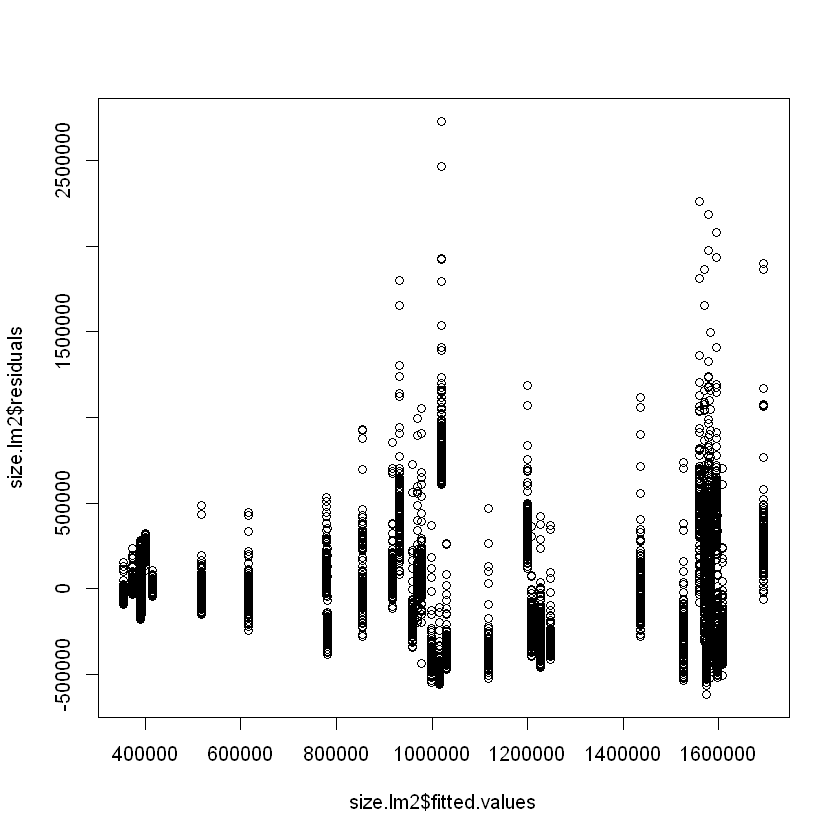

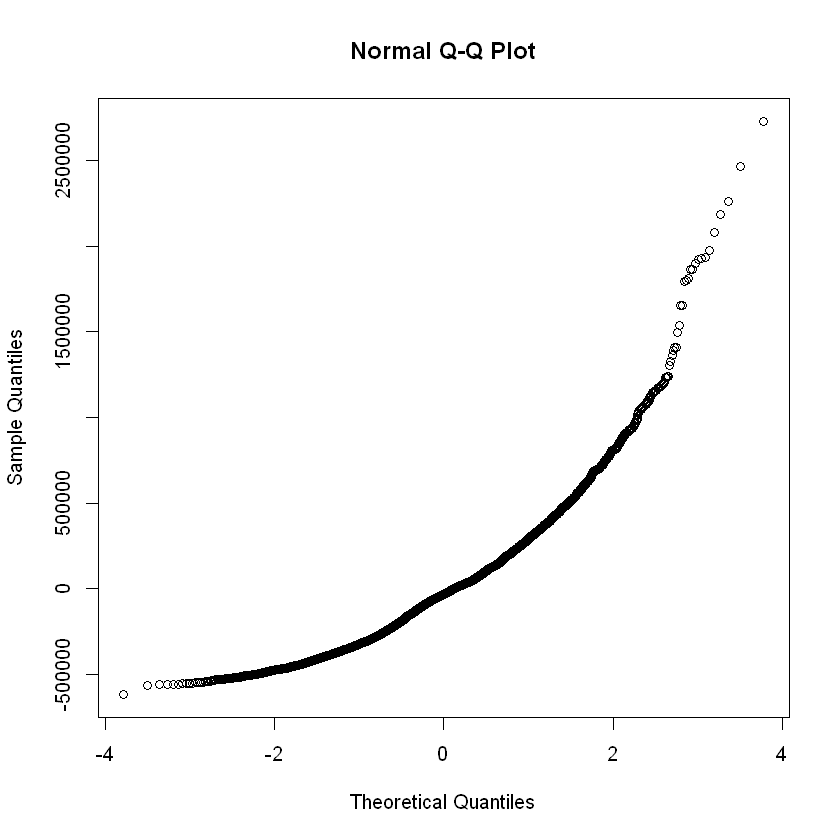

In [14]:
# Simple regression: Weekly_Sales ~ Size
size.lm2 <- lm(Weekly_Sales~Size,data=data.agg)
summary(size.lm2) # R-squared is not bad this time!: .66

# Plot the data with the fitted line
plot(data.agg$Size,data.agg$Weekly_Sales)
lines(data.agg$Size,size.lm2$fitted.values,col='red')

# Fitted vs. Residuals plot: non-constant variance
plot(size.lm2$fitted.values, size.lm2$residuals)

# QQ Normal Probability Plot: curved
qqnorm(size.lm2$residuals)



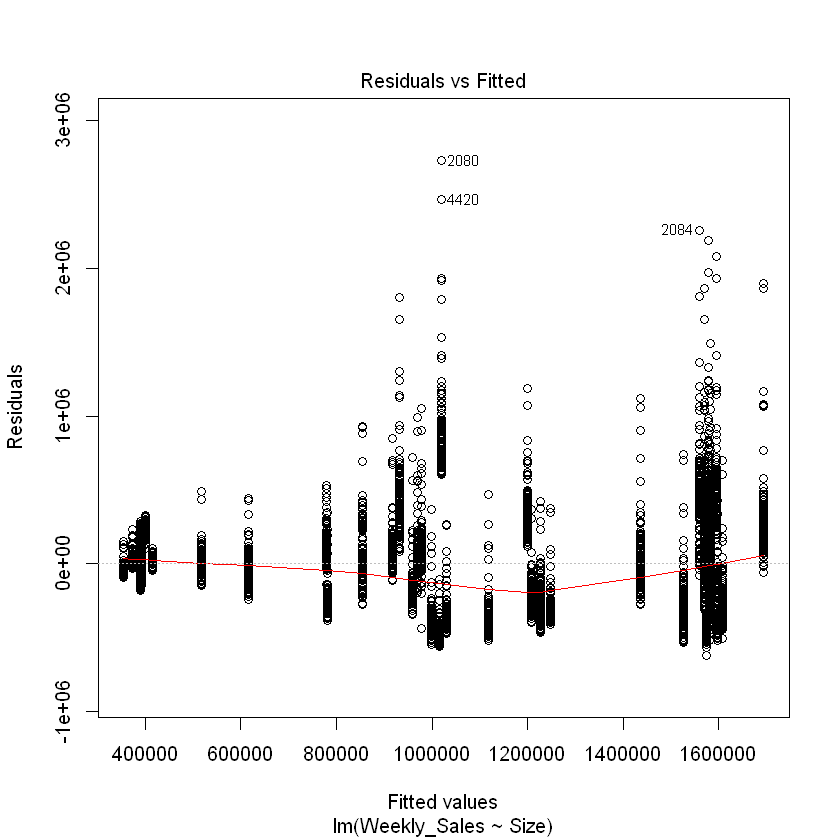

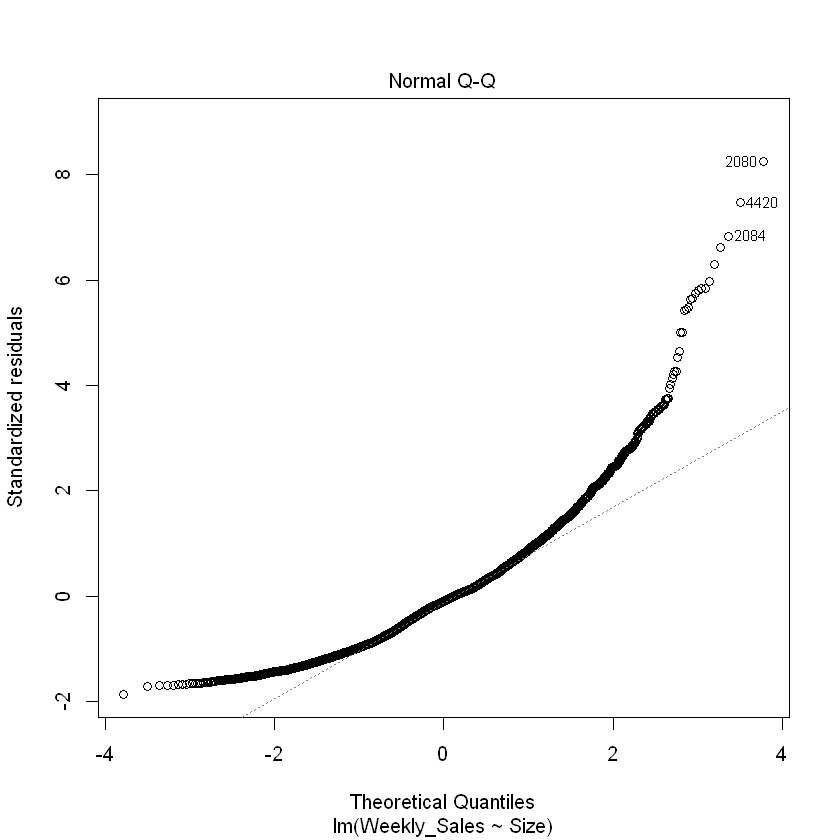

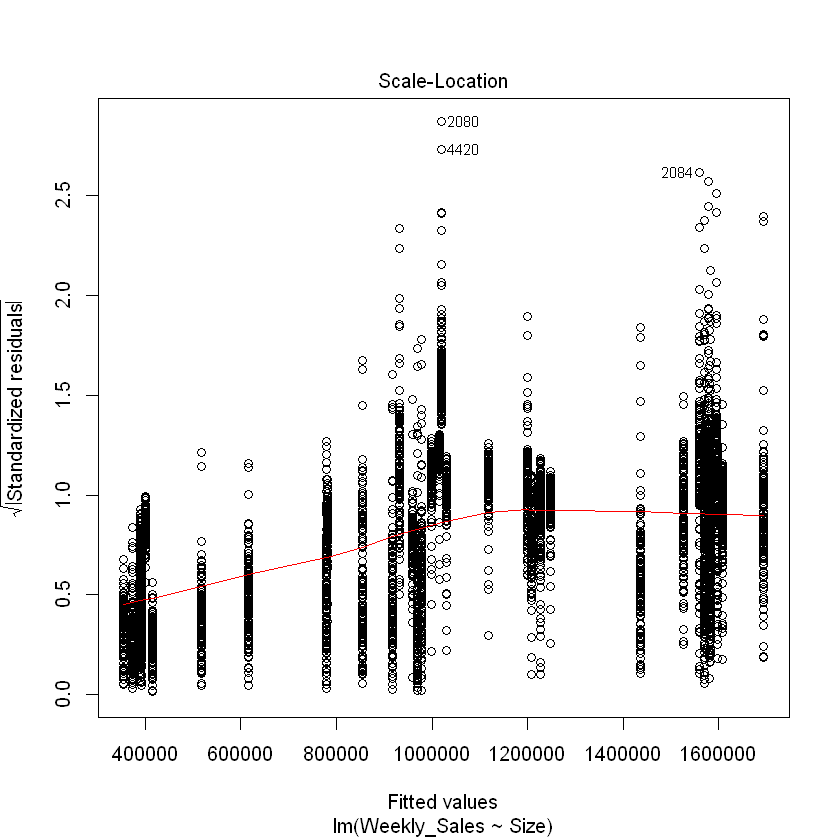

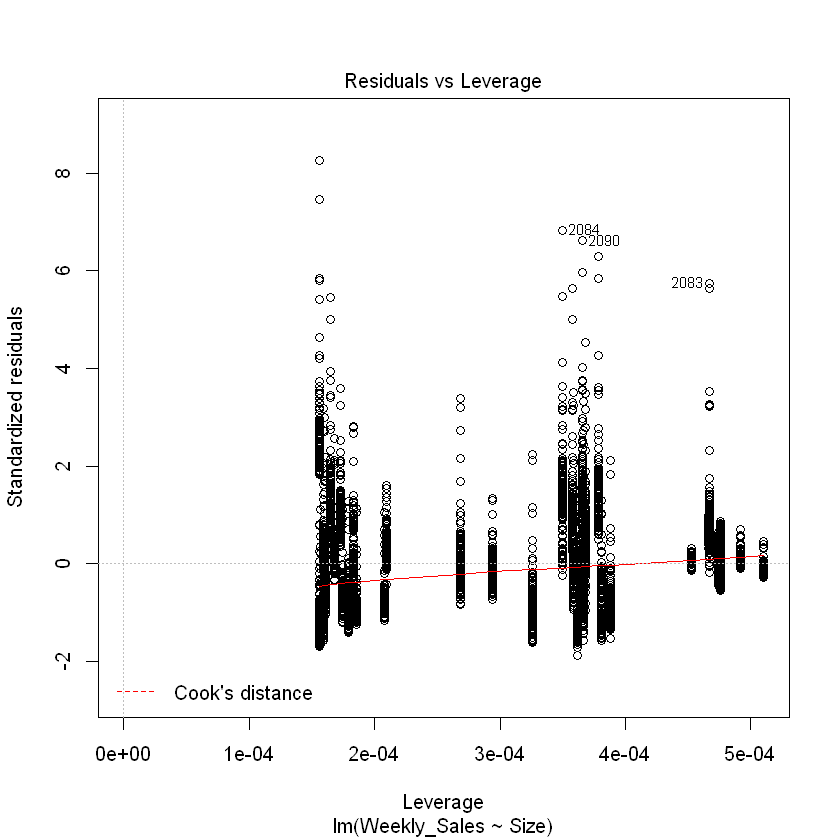

In [15]:
plot(size.lm2)


Call:
lm(formula = abs(size.lm2$residuals) ~ data.agg$Size)

Residuals:
    Min      1Q  Median      3Q     Max 
-356209 -114235  -28449   78032 2487256 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   7.194e+04  5.785e+03   12.44   <2e-16 ***
data.agg$Size 1.346e+00  3.996e-02   33.68   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 202300 on 6433 degrees of freedom
Multiple R-squared:  0.1499,	Adjusted R-squared:  0.1498 
F-statistic:  1134 on 1 and 6433 DF,  p-value: < 2.2e-16



Call:
lm(formula = Weekly_Sales ~ Size, data = data.agg, weights = w)

Weighted Residuals:
     Min       1Q   Median       3Q      Max 
-1482.32    -0.59     1.08     2.62  2433.09 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.423e+05  3.351e+03   42.47   <2e-16 ***
Size        5.249e+00  2.286e-02  229.59   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 57.25 on 6433 degrees of freedom
Multiple R-squared:  0.8912,	Adjusted R-squared:  0.8912 
F-statistic: 5.271e+04 on 1 and 6433 DF,  p-value: < 2.2e-16


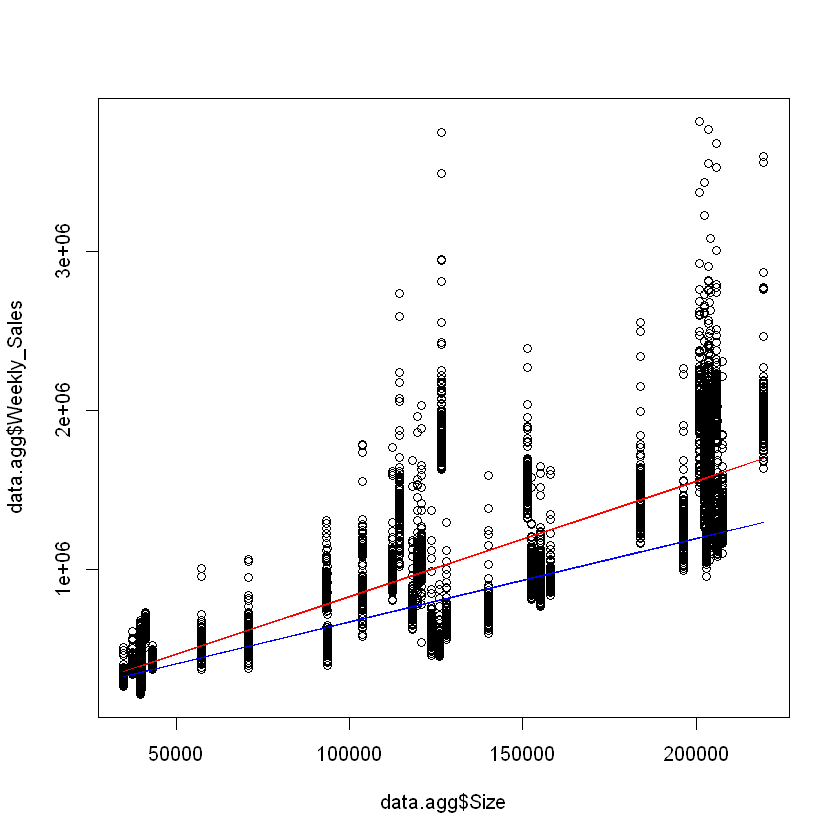

In [16]:
# Remedial measures required:
# Since we know type of store indicates size
# and we have far fewer type C stores than type A
# the difference in variability is probably due to the fact
# that we have more data for the larger stores than the smaller stores
# We can do a weighted least squares model where the weights are proportional
# to count

# First regress absolute residuals against Size
resid.lm <- lm(abs(size.lm2$residuals)~data.agg$Size)
summary(resid.lm)

# Now, get the weights
w <- 1/(abs(resid.lm$residuals))^2

# Now, do a weighted least squares model regressing sales against size with the weights
size.lm.weighted <- lm(Weekly_Sales~Size,data=data.agg,weights=w)
summary(size.lm.weighted) # Yes! Our R-squared went up to .89!

# Let's compare this to the ordinary least squares model
plot(data.agg$Size,data.agg$Weekly_Sales)
lines(data.agg$Size,size.lm2$fitted.values,col='red')
lines(data.agg$Size,size.lm.weighted$fitted.values,col='blue')

In [74]:
resid.lm


Call:
lm(formula = abs(size.lm2$residuals) ~ data.agg$Size)

Coefficients:
  (Intercept)  data.agg$Size  
    71939.602          1.346  


In [75]:
w1 <- 1/(resid.lm$coeff[1]+(resid.lm$coeff[2]*data.agg$Size))

# Now, do a weighted least squares model regressing sales against size with the weights
size.lm.weighted1 <- lm(Weekly_Sales~Size,data=data.agg,weights=w1)
summary(size.lm.weighted1) # Yes! Our R-squared went up to .89!



Call:
lm(formula = Weekly_Sales ~ Size, data = data.agg, weights = w1)

Weighted Residuals:
    Min      1Q  Median      3Q     Max 
-1145.0  -462.9   -92.0   348.0  5545.0 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.223e+05  7.063e+03   17.32   <2e-16 ***
Size        7.097e+00  5.761e-02  123.19   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 633.7 on 6433 degrees of freedom
Multiple R-squared:  0.7023,	Adjusted R-squared:  0.7023 
F-statistic: 1.518e+04 on 1 and 6433 DF,  p-value: < 2.2e-16


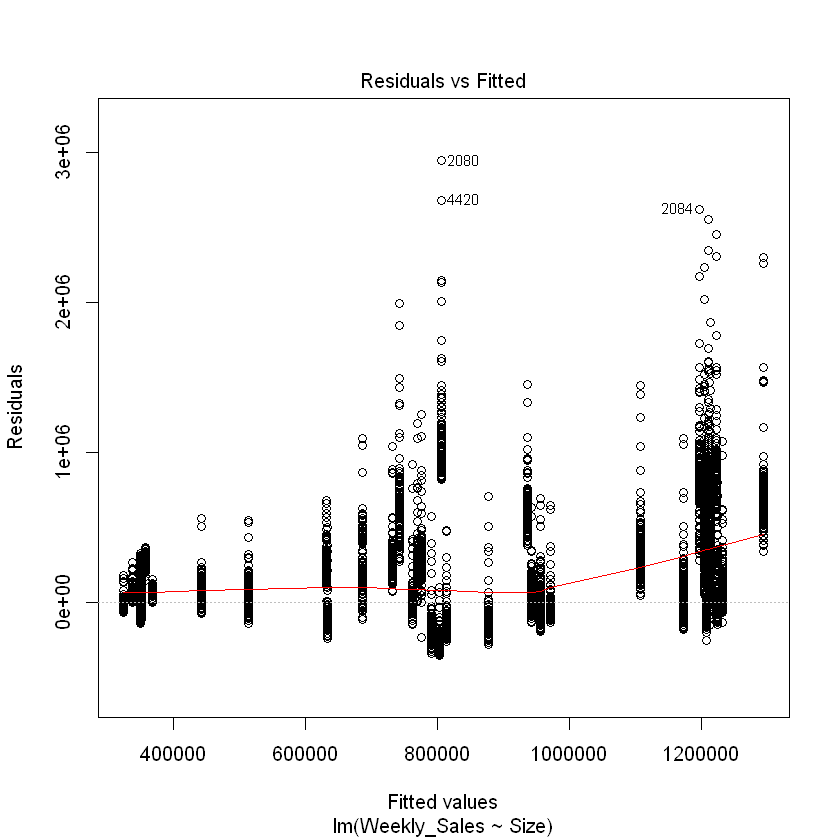

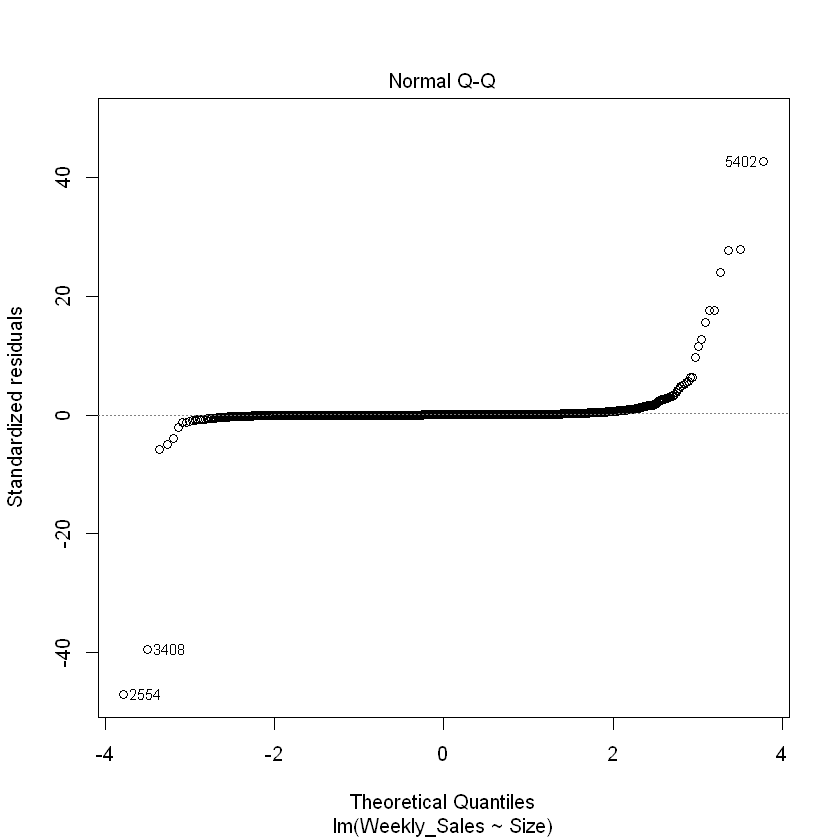

Warning message in sqrt(crit * p * (1 - hh)/hh):
"NaNs produced"Warning message in sqrt(crit * p * (1 - hh)/hh):
"NaNs produced"

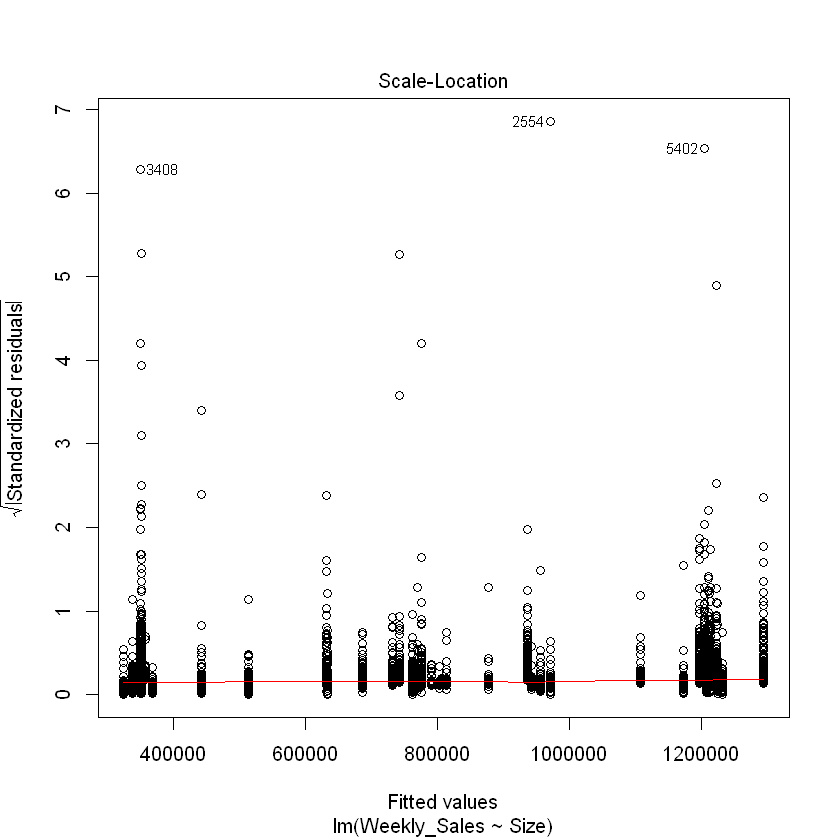

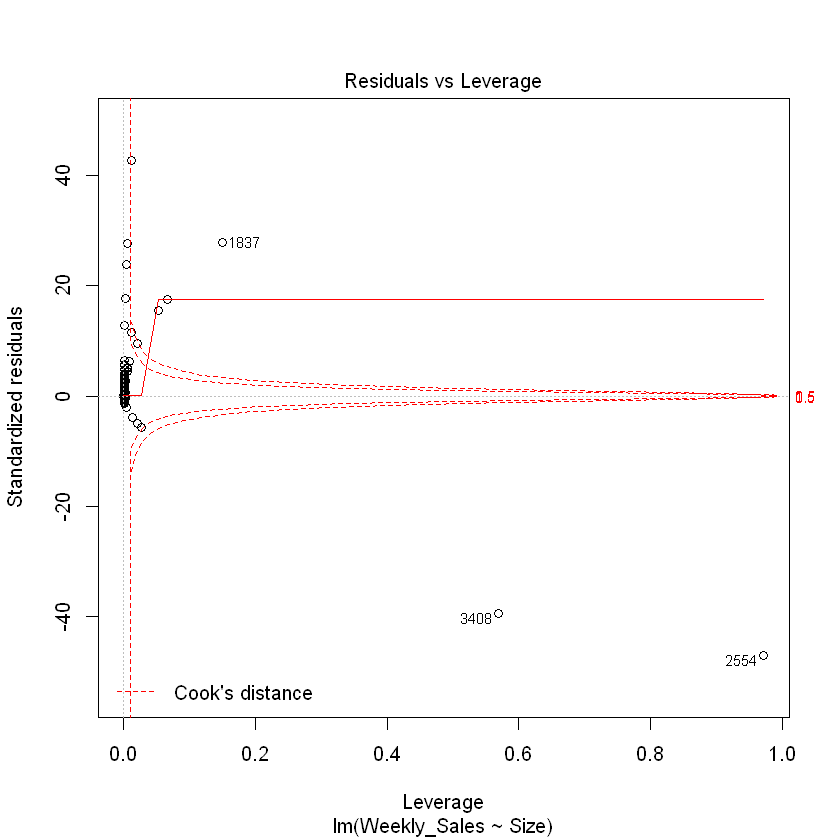

In [60]:
plot(size.lm.weighted)

In [ ]:
lm.dept.type <- lm(Weekly_Sales~factor(Dept)+factor(Type)+IsHoliday,data=wm)

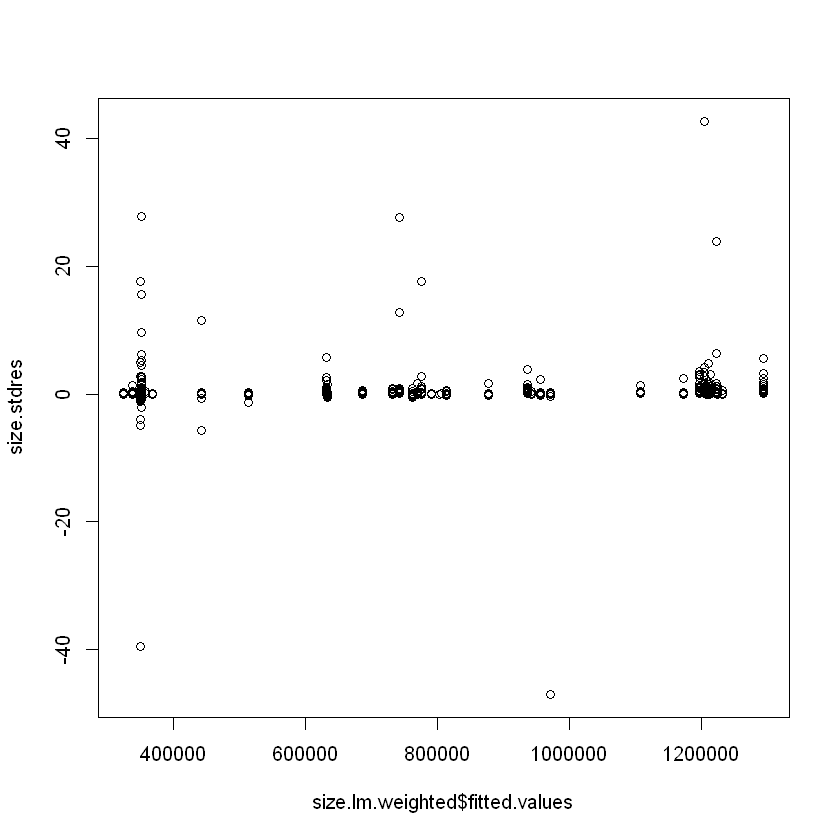

In [17]:


# We can see from the plot that doing a weighted-least squares model
# brought down the regression line so that it is less influenced by the
# high variability of the larger stores

# Check standardized residuals with fitted vs standardized residuals plot
size.stdres <- rstandard(size.lm.weighted)

plot(size.lm.weighted$fitted.values,size.stdres)
# Variation looks more consistent 

# Follow-up questions:
# 1. What happens to weekly sales for each additional square foot in size?
# 2. How does the price change for two identical stores but one has 50k more square feet?
# 3. Does size help predict weekly sales? What does the p-value say? What does the R-sq say?

# It looks like there are some outlying/trailing data points across the store size spectrum that
# have higher weekly sales than . A multivariate model will be better at accounting for those values.
# Perhaps holidays had a positive impact on weekly sales for those data points?


In [26]:

###########################################################

# Model using original set of holidays
lm.size_holiday1 <- lm(Weekly_Sales~Size+IsHoliday,data=data.agg)
summary(lm.size_holiday1)
# Model using more holidays has slightly higher R-sq
lm.size_holiday2 <- lm(Weekly_Sales~Size+IsHolidayFixed,data=data.agg)
summary(lm.size_holiday2)






Call:
lm(formula = Weekly_Sales ~ Size + IsHoliday, data = data.agg)

Residuals:
    Min      1Q  Median      3Q     Max 
-694413 -243196  -32669  158930 2735163 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   9.708e+04  9.503e+03  10.215  < 2e-16 ***
Size          7.247e+00  6.518e-02 111.182  < 2e-16 ***
IsHolidayTRUE 8.163e+04  1.613e+04   5.061 4.29e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 330000 on 6432 degrees of freedom
Multiple R-squared:  0.6582,	Adjusted R-squared:  0.6581 
F-statistic:  6194 on 2 and 6432 DF,  p-value: < 2.2e-16



Call:
lm(formula = Weekly_Sales ~ Size + IsHolidayFixed, data = data.agg)

Residuals:
    Min      1Q  Median      3Q     Max 
-703770 -238944  -31910  161513 2644174 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        7.515e+04  9.636e+03   7.799 7.24e-15 ***
Size               7.247e+00  6.460e-02 112.178  < 2e-16 ***
IsHolidayFixedTRUE 1.129e+05  9.483e+03  11.907  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 327100 on 6432 degrees of freedom
Multiple R-squared:  0.6643,	Adjusted R-squared:  0.6642 
F-statistic:  6363 on 2 and 6432 DF,  p-value: < 2.2e-16


In [21]:
library(leaps)

In [27]:
# Two-factor model: Department and IsHoliday
lm.dept.type <- lm(Weekly_Sales~factor(Dept)+factor(Type)+IsHoliday,data=wm)
#summary(lm.dept.type)
#plot(lm.dept.type)


ERROR: Error in `contrasts<-`(`*tmp*`, value = contr.funs[1 + isOF[nn]]): contrasts can be applied only to factors with 2 or more levels


In [23]:
###########################################################
# Best subsets on aggregated store data
library(leaps)

#Cp
leaps.cp.agg <- leaps(y=data.agg$Weekly_Sales,x=data.agg[,4:12])
leapsfull.agg <- data.frame(cbind(leaps.cp.agg$which,size=leaps.cp.agg$size,Cp=leaps.cp.agg$Cp))
leapsfull.agg[leapsfull.agg$Cp < 50,] -> best.cp

#Adj R2
leaps.adjR2.agg <- leaps(y=data.agg$Weekly_Sales,x=data.agg[,4:12],nbest=10,method="adjr2")
leapsfull.agg.adjR2 <- data.frame(cbind(leaps.adjR2.agg$which,size=leaps.adjR2.agg$size,adjr2=leaps.adjR2.agg$adjr2))
leapsfull.agg.adjR2[leapsfull.agg.adjR2$adjr2 > .68,] -> best.adjr2

# Based on both adjR2 and Cp, the best model subsets are:
# Weekly_Sales ~ Temperature + CPI + Unemployment + Type + Size + Week + IsHolidayFixed (adjR2=.6806188; cp=11.532115)
# Weekly_Sales ~ Temperature + Fuel_Price + CPI + Unemployment + Type + Size + Week + IsHolidayFixed (adjR2=.6808181; cp=8.519027)
# Weekly_Sales ~ IsHoliday + Temperature + CPI + Unemployment + Type + Size + Week + IsHolidayFixed (adjR2=.6805914; cp=13.082784)
# Weekly_Sales ~ IsHoliday + Temperature + Fuel_Price + CPI + Unemployment + Type + Size + Week + IsHolidayFixed (adjR2=.6807942; cp=10)



ERROR: Error in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = NCOL(x) + int, : NA/NaN/Inf in foreign function call (arg 4)
